In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
Prepare your preprocessed dataset for clustering
- do you need to remove some variables?
- do you need to normalize?

In [2]:
df = pd.read_csv('versionepulitamed.csv', skipinitialspace=True)

In [3]:
df_numeric=df.drop(columns=['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime','Apricot', 'Black', 'Black Brindle', 'Black Smoke',
       'Blue', 'Blue Cream', 'Blue Merle', 'Blue Tick', 'Blue Tiger', 'Brown',
       'Brown Brindle', 'Brown Merle', 'Brown Tiger', 'Buff', 'Chocolate',
       'Cream', 'Fawn', 'Gold', 'Gray', 'Liver', 'Liver Tick', 'Orange', 'Red',
       'Red Merle', 'Red Tick', 'Sable', 'Silver', 'Tan', 'Tortie', 'Tricolor',
       'White', 'Yellow', 'Yellow Brindle', 'Mixed_breed','breed_category','similar_breed'])

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [6]:
X=df_numeric.values

In [7]:
X

array([[10.        , 13.        ,  0.17075342, ..., 65.        ,
        29.        ,  2.24137931],
       [10.        , 12.        ,  0.19102359, ..., 65.        ,
        24.        ,  2.70833333],
       [14.        , 16.        ,  8.0594121 , ...,  5.        ,
         6.5       ,  0.76923077],
       ...,
       [12.        , 14.        ,  1.01296233, ..., 55.        ,
        21.5       ,  2.55813953],
       [12.        , 13.        , 10.29515221, ..., 60.        ,
        21.5       ,  2.79069767],
       [12.        , 13.        ,  1.88902397, ..., 60.        ,
        21.5       ,  2.79069767]])

In [8]:
scaler.fit(X)

MinMaxScaler()

In [9]:
scaler.data_max_

array([ 14.        ,  18.        ,  19.278086  ,   3.43848554,
         7.11964035,   7.26924948,   7.17105692,   6.12543442,
         6.69105449,   6.5002121 ,   4.10958448,   7.02950595,
         6.9909579 ,   7.38407271,   7.26686036,   7.27333784,
       141.25      ,  31.        ,   4.55645161])

In [10]:
scaler.data_min_

array([7.00000000e+00, 9.00000000e+00, 1.56012177e-03, 1.90258752e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.00000000e+00, 6.50000000e+00, 7.50000000e-01])

In [11]:
X1 = scaler.transform(X)

In [12]:
X1

array([[0.42857143, 0.44444444, 0.00877717, ..., 0.44036697, 0.91836735,
        0.39180304],
       [0.42857143, 0.33333333, 0.00982871, ..., 0.44036697, 0.71428571,
        0.5144774 ],
       [1.        , 0.77777778, 0.4180137 , ..., 0.        , 0.        ,
        0.00505215],
       ...,
       [0.71428571, 0.55555556, 0.05246808, ..., 0.36697248, 0.6122449 ,
        0.47501971],
       [0.71428571, 0.44444444, 0.53399623, ..., 0.40366972, 0.6122449 ,
        0.53611549],
       [0.71428571, 0.44444444, 0.09791515, ..., 0.40366972, 0.6122449 ,
        0.53611549]])

In [13]:
np.min(X1, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [14]:
np.max(X1, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

## Centroid-Based
- identify the best parameter choice (k)
- use plots to visualize the clusters (you can use dimensionality reduction techniques)
- evaluate quantitatively and qualitatively:
    - compare the clusters with some categorical variable (for example using crosstab, or scatter plots)
    - evaluate the clusters using some quantitative metric (e.g., silhouette)
    - do you see something interesting?

Per stabilire il k ottimale utilizzo il knee method.

Dal grafico sottostante  emerge che il valore ottimale si aggira intorno  a valori compresi tra il 2 e il 10

In [15]:
from sklearn.cluster import KMeans

In [16]:
k_min = 2
k_max = 50

k_values = np.arange(k_min, k_max)
sse_values = list()

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X1)
    sse_values.append(kmeans.inertia_)

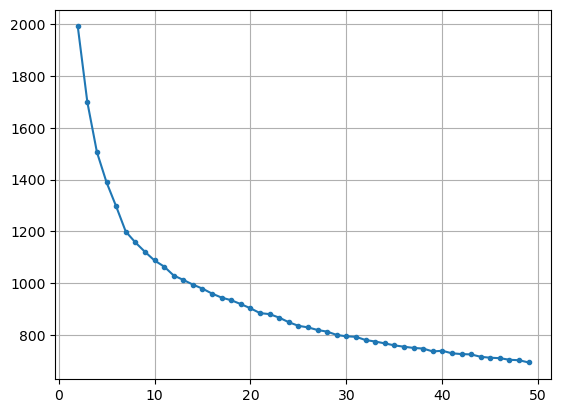

In [17]:
plt.plot(k_values, sse_values, marker='.')
plt.grid()
plt.show()

Successivamente per stabilire il valore k ottimale con più certezza  ho osservato l'andamento del silhouette score che ha il suo massimo per valori di k compresi tra 2 e 10 circa

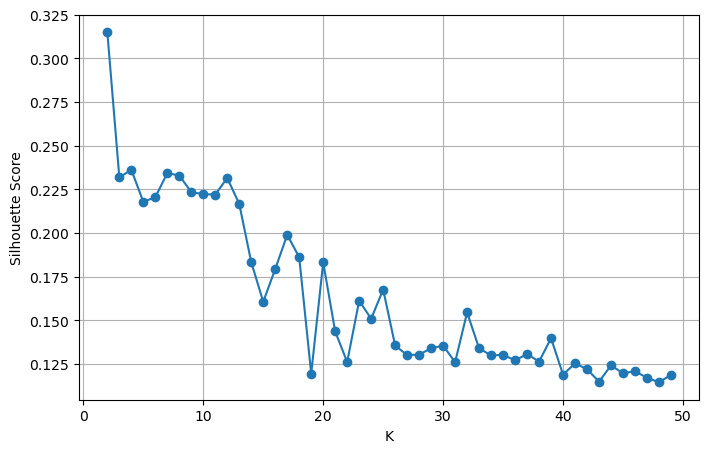

In [18]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X1)
    score = silhouette_score(X1, labels)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


Dall'osservazione dell'anadamento numerico del silhouette score i valori di k=2 e k=3 sembrano i valori ottimali tra cui scegliere

In [19]:
k_values = range(2, 11) 
silhouette_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X1)  
    score = silhouette_score(X1, labels)
    silhouette_scores.append(score)
    print('Numero di cluster: {}, Silhouette Score: {}'.format(k,score))


Numero di cluster: 2, Silhouette Score: 0.3150471238436572
Numero di cluster: 3, Silhouette Score: 0.23188706482084653
Numero di cluster: 4, Silhouette Score: 0.23628728470483162
Numero di cluster: 5, Silhouette Score: 0.2178781842952333
Numero di cluster: 6, Silhouette Score: 0.22054694326208588
Numero di cluster: 7, Silhouette Score: 0.23437382374652185
Numero di cluster: 8, Silhouette Score: 0.23296555781496142
Numero di cluster: 9, Silhouette Score: 0.2234609116039197
Numero di cluster: 10, Silhouette Score: 0.2222938037353659


Il valore silhouette score per k=2 è il migliore, nonostante il punteggio, considerando il range del coefficiente, non sia ottimale 

In [20]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=42)

In [21]:
kmeans.fit(X1)

KMeans(n_clusters=2, n_init=100, random_state=42)

In [22]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
df_numeric['KMeans_LabelK2'] = kmeans.labels_

In [24]:
df_numeric.head()

,breed_min_life_expectancy2,breed_max_life_expectancy2,dog_age,length_of_stay,playfulness2,good_with_children2,good_with_other_dogs2,shedding2,grooming2,drooling2,coat_length2,good_with_strangers2,protectiveness2,trainability2,energy2,barking2,breed_avg_weight2,breed_avg_height2,weight_height_ratio,KMeans_LabelK2
0,10.0,13.0,0.170753,0.083801,3.191688,2.625100,3.615374,3.506990,0.365627,0.218111,0.396311,2.177002,3.390986,2.873580,4.167703,1.974363,65.0,29.00,2.241379,0
1,10.0,12.0,0.191024,0.088318,3.916796,5.835203,2.925542,1.663397,2.324304,3.481632,1.720616,4.839427,3.144705,3.010407,4.231642,2.737943,65.0,24.00,2.708333,0
2,14.0,16.0,8.059412,0.014233,3.577027,2.544920,4.314612,3.359707,0.217080,0.000000,1.507057,2.740278,3.620172,1.832087,2.834511,5.015286,5.0,6.50,0.769231,1
3,12.0,16.0,9.023539,0.016787,2.203599,2.835409,2.936067,3.165869,2.045838,0.475766,1.696648,2.523325,3.770284,3.482516,2.037904,3.420557,5.0,6.50,0.769231,1
4,10.0,18.0,1.026486,0.011556,3.094009,4.391545,4.955892,0.172306,3.903627,0.360951,0.162845,3.372774,2.924166,4.698562,2.944130,2.754888,12.5,9.75,1.282051,1


In [25]:
df_numeric['KMeans_LabelK2'] = kmeans.labels_
print(df_numeric['KMeans_LabelK2'].value_counts())

KMeans_LabelK2
0    3162
1    1325
Name: count, dtype: int64


In [26]:
kmeans.inertia_

1990.4187661013116

In [27]:
kmeans.cluster_centers_

array([[0.6169016 , 0.48761332, 0.13423714, 0.02024981, 0.55381964,
        0.51166955, 0.4270195 , 0.50901875, 0.29019288, 0.23506478,
        0.24903466, 0.53964115, 0.47389589, 0.53463875, 0.57370344,
        0.39077996, 0.4074529 , 0.64293298, 0.50842351],
       [0.85433962, 0.76901468, 0.16404435, 0.01270891, 0.55135899,
        0.3082813 , 0.47198217, 0.31708427, 0.26942997, 0.17991899,
        0.4120278 , 0.39176881, 0.56315631, 0.44815119, 0.51486992,
        0.6204724 , 0.03327706, 0.06075472, 0.10017066]])

In [28]:
columns=df_numeric.columns.tolist()

In [29]:
columns[:-1]

['breed_min_life_expectancy2',
 'breed_max_life_expectancy2',
 'dog_age',
 'length_of_stay',
 'playfulness2',
 'good_with_children2',
 'good_with_other_dogs2',
 'shedding2',
 'grooming2',
 'drooling2',
 'coat_length2',
 'good_with_strangers2',
 'protectiveness2',
 'trainability2',
 'energy2',
 'barking2',
 'breed_avg_weight2',
 'breed_avg_height2',
 'weight_height_ratio']

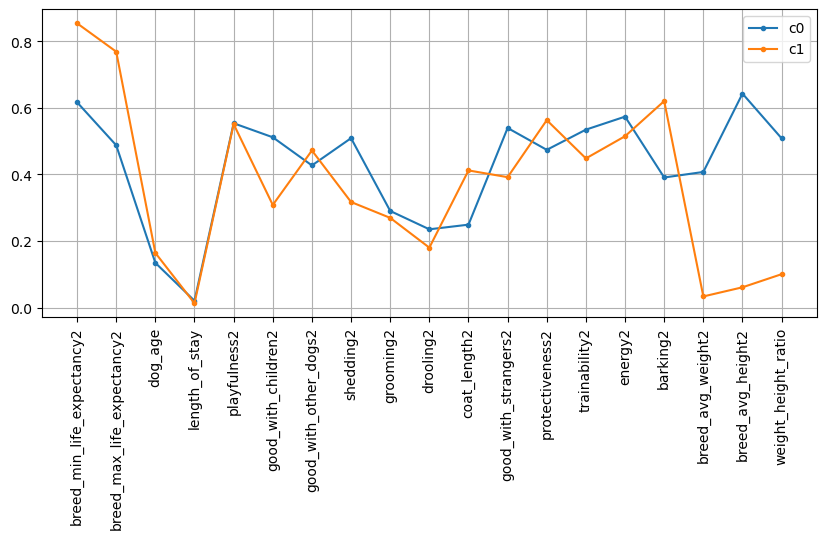

In [30]:
plt.figure(figsize=(10,4))
for l in np.unique(kmeans.labels_):
    plt.plot(columns[:-1], kmeans.cluster_centers_[l], marker='.', label='c%s' % l)
plt.legend()
plt.grid()
plt.xticks(rotation=90)
plt.show()

Per k=2  a livello di valori grafico e di valori medi le separazioni più nette si confermano per  il peso e l'altezza media e il rapporto tra il peso e l'altezza  dei cani

In [31]:
df_centers = df_numeric.groupby(['KMeans_LabelK2'])[columns].mean()
df_centers.head()

,breed_min_life_expectancy2,breed_max_life_expectancy2,dog_age,length_of_stay,playfulness2,good_with_children2,good_with_other_dogs2,shedding2,grooming2,drooling2,coat_length2,good_with_strangers2,protectiveness2,trainability2,energy2,barking2,breed_avg_weight2,breed_avg_height2,weight_height_ratio,KMeans_LabelK2
KMeans_LabelK2,,,,,,,,,,,,,,,,,,,,
0,11.318311,13.388520,2.589186,0.069631,3.942997,3.719454,3.062181,3.117961,1.941696,1.527971,1.023429,3.793411,3.312986,3.947811,4.169023,2.842275,60.515457,22.251858,2.685289,0.0
1,12.980377,15.921132,3.163765,0.043701,3.925478,2.240974,3.384611,1.942279,1.802771,1.169512,1.693263,2.753941,3.937002,3.309181,3.741488,4.512905,9.534000,7.988491,1.131295,1.0


Dai grafici seguenti si evince che con k=2 il cluster 0 ha molti più più punti rispetto al cluster 1 e che ad eccezione dei valori di peso e altezza nessun altra variabile presenta pattern di separazione evidenti e possibili relazioni lineari.

Nella sezione sottostante, per questo motivo, ho scelto di visualizzare tramite boxplot le distribuzioni solo delle variabili relative al peso e all'altezza.

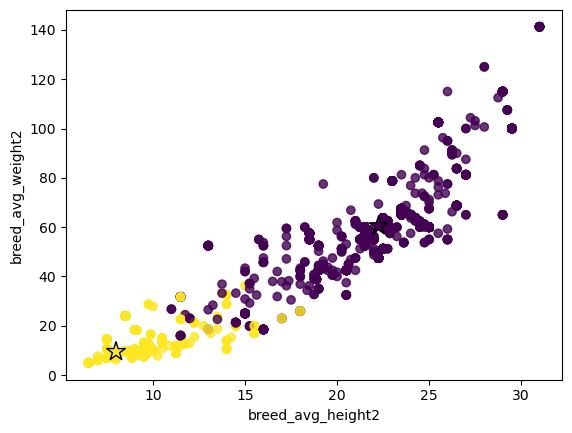

In [32]:
x = 'breed_avg_height2'
y = 'breed_avg_weight2'



plt.scatter(df_numeric[x], df_numeric[y], c=df_numeric['KMeans_LabelK2'], alpha=0.8)
plt.scatter(df_centers[x], df_centers[y], 
            c=df_centers.index, s=200, edgecolor='k', marker='*')

plt.xlabel(x)
plt.ylabel(y)
plt.show()

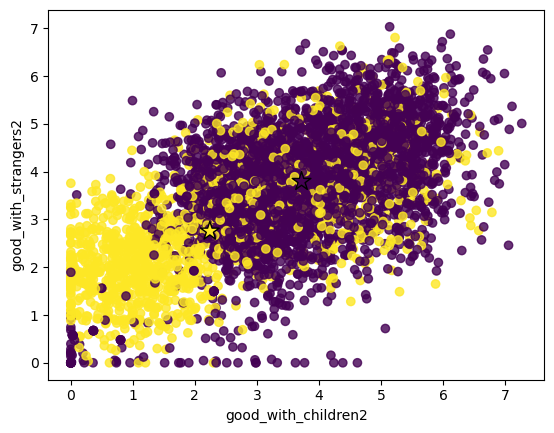

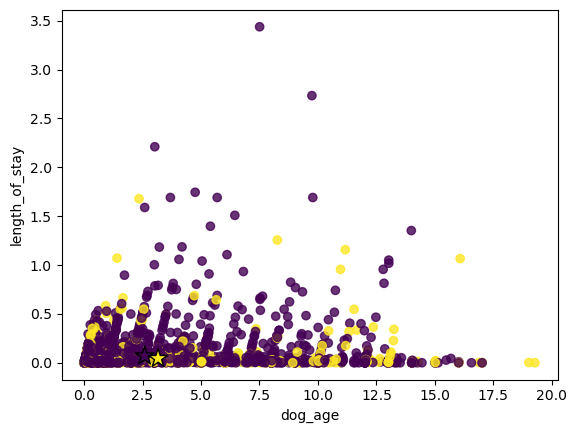

In [33]:
x = 'good_with_children2'
y = 'good_with_strangers2'



plt.scatter(df_numeric[x], df_numeric[y], c=df_numeric['KMeans_LabelK2'], alpha=0.8)
plt.scatter(df_centers[x], df_centers[y], 
            c=df_centers.index, s=200, edgecolor='k', marker='*')

plt.xlabel(x)
plt.ylabel(y)
plt.show()




x = 'dog_age'
y = 'length_of_stay'



plt.scatter(df_numeric[x], df_numeric[y], c=df_numeric['KMeans_LabelK2'], alpha=0.8)
plt.scatter(df_centers[x], df_centers[y], 
            c=df_centers.index, s=200, edgecolor='k', marker='*')

plt.xlabel(x)
plt.ylabel(y)
plt.show()

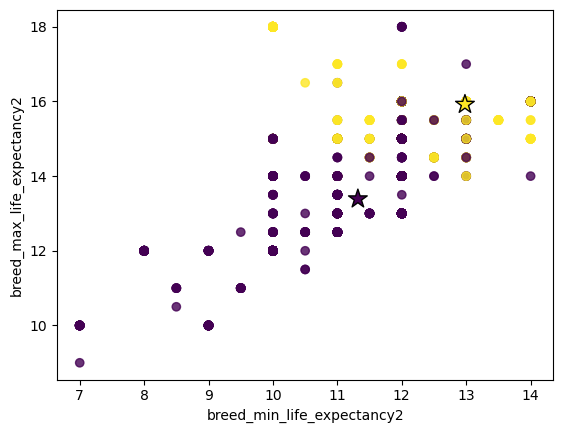

In [34]:
x = 'breed_min_life_expectancy2'
y = 'breed_max_life_expectancy2'



plt.scatter(df_numeric[x], df_numeric[y], c=df_numeric['KMeans_LabelK2'], alpha=0.8)
plt.scatter(df_centers[x], df_centers[y], 
            c=df_centers.index, s=200, edgecolor='k', marker='*')

plt.xlabel(x)
plt.ylabel(y)
plt.show()







Dal confronto qualitativo con le 30 razze più rappresentative del campione si evince che alcune razze di taglia piccola come ad esempio i Chihuahua puri e misti si trovano nel cluster 1, mentre cani di taglia 

medio-grande come i Labrador puri e misti e i Great Pyreness puri e misti si trovano nel cluster 0 quindi potrebbe esserci una suddivisione tra cani di taglia piccola e cani medio-grandi

In [35]:
pd.crosstab(df['breed_category'], df_numeric['KMeans_LabelK2']) 

KMeans_LabelK2,0,1
breed_category,,
American Bulldog Mix,24,0
American Staffordshire Terrier Mix,22,0
Anatol Shepherd Mix,29,0
Australian Cattle Dog Mix,120,0
Australian Kelpie Mix,21,0
Australian Shepherd Mix,52,0
Beagle Mix,35,11
Border Collie Mix,63,0
Boxer Mix,81,0


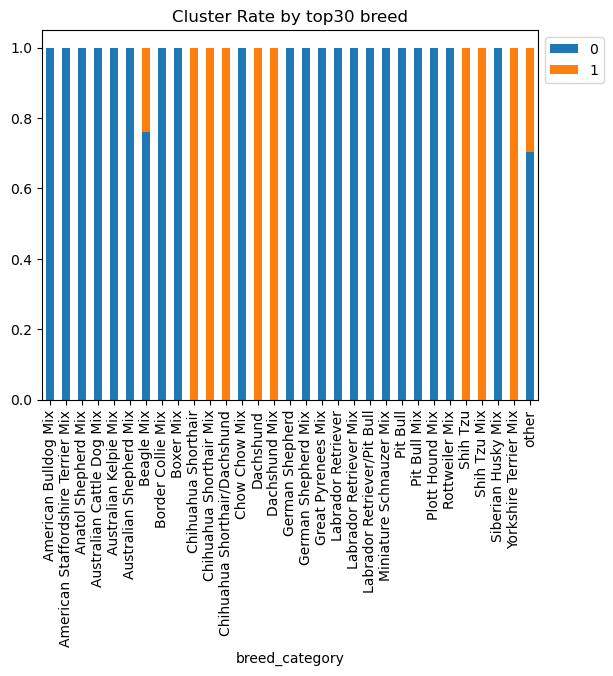

In [36]:
x='Cluster'
y= 'top30 breed'


pc = pd.crosstab(df['breed_category'], df_numeric['KMeans_LabelK2'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

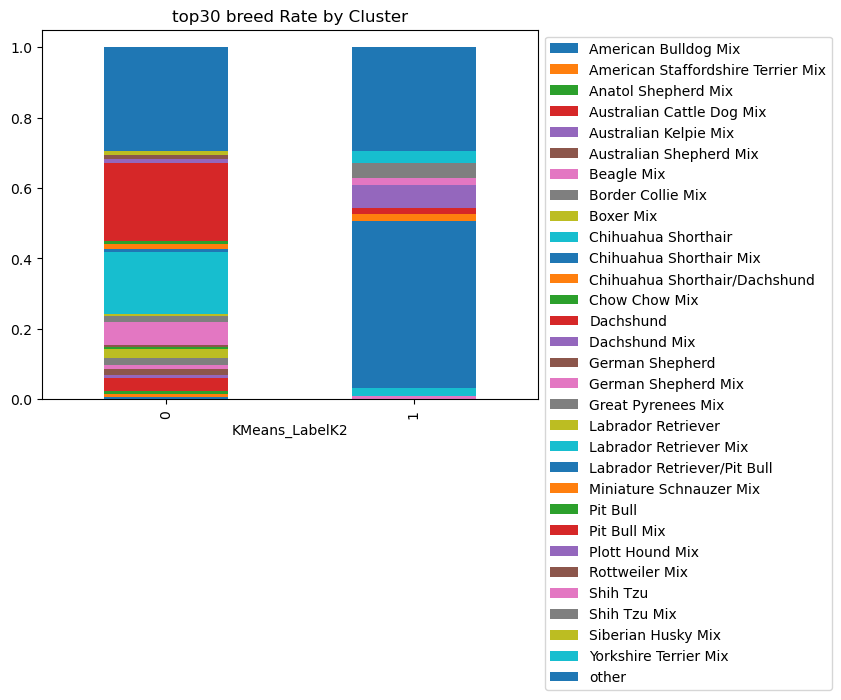

In [37]:
x='top30 breed'
y= 'Cluster'

pc = pd.crosstab( df_numeric['KMeans_LabelK2'],df['breed_category'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Osservando la cross tab  per k=2 la suddivisione è netta tra taglia piccola e un macrogruppo che comprende medie-grandi.

Confronto tra pesi per k=2

Ogni cluster presenta degli  outliers, il cluster 0 numero due  sembra contenere i valori più estremi associati molto probabilmente ai cani di taglia gigante individuati nell fase di data understanding

In [38]:

df_numeric.groupby('KMeans_LabelK2')['breed_avg_weight2'].mean()

KMeans_LabelK2
0    60.515457
1     9.534000
Name: breed_avg_weight2, dtype: float64

In [39]:
df_numeric.groupby('KMeans_LabelK2')['breed_avg_weight2'].std()

KMeans_LabelK2
0    16.190020
1     6.692556
Name: breed_avg_weight2, dtype: float64

In [40]:
weight_mapping = {
    0: 'Small',
    1: 'Large'
}

df['weight_category'] = df_numeric['KMeans_LabelK2'].map(weight_mapping)

Nel mapping ho invertito l'etichetta del clustering con la grandezza del cane, per mancanza di tempo non la modifico, ma nei commenti successivi mi riferisco al cluster 0 per i cani grandi e al cluster 1 per i piccoli. 

In [41]:
pd.crosstab(df['weight_category'], df_numeric['KMeans_LabelK2'])

KMeans_LabelK2,0,1
weight_category,,
Large,0,1325
Small,3162,0


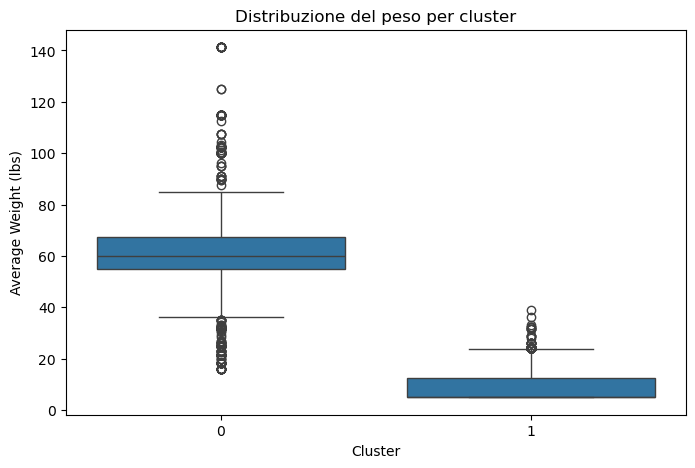

In [42]:

plt.figure(figsize=(8,5))
sns.boxplot(x=df_numeric['KMeans_LabelK2'], y=df_numeric['breed_avg_weight2'])
plt.xlabel('Cluster')
plt.ylabel('Average Weight (lbs)')
plt.title('Distribuzione del peso per cluster')
plt.show()

Con due cluster ho cani estremamente piccoli  nel primo cluster 1 e cani nettamente grandi nel cluster 0

Confronto tra la suddivisione per altezza

Il cluster 0 coglie le variazioni di altezza dei cani giganti

In [43]:
df_numeric.groupby('KMeans_LabelK2')['breed_avg_height2'].mean()

KMeans_LabelK2
0    22.251858
1     7.988491
Name: breed_avg_height2, dtype: float64

In [44]:
df_numeric.groupby('KMeans_LabelK2')['breed_avg_height2'].std()

KMeans_LabelK2
0    3.040663
1    2.279076
Name: breed_avg_height2, dtype: float64

In [45]:
height_mapping = {
    0: 'Small',
    1: 'Tall'
}

df['height_category'] = df_numeric['KMeans_LabelK2'].map(height_mapping)

Nel mapping ho invertito l'etichetta del clustering associata alla grandezza del cane, per mancanza di tempo non la modifico, ma nei commenti successivi mi riferisco al cluster 0 per i cani grandi e al cluster 1 per i cani piccoli

In [46]:
pd.crosstab(df['height_category'], df_numeric['KMeans_LabelK2'])

KMeans_LabelK2,0,1
height_category,,
Small,3162,0
Tall,0,1325


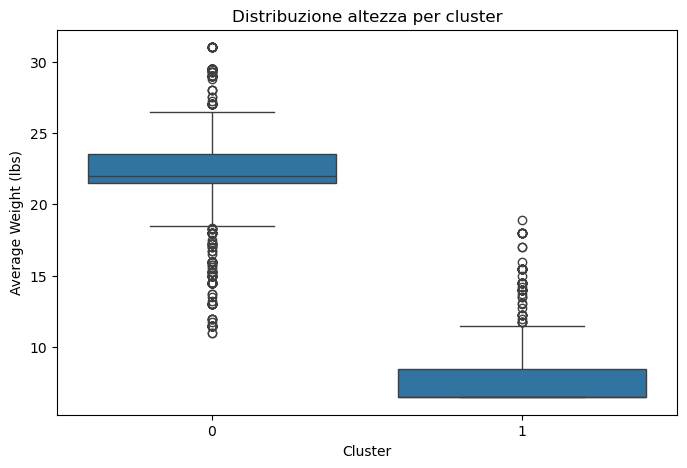

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_numeric['KMeans_LabelK2'], y=df_numeric['breed_avg_height2'])
plt.xlabel('Cluster')
plt.ylabel('Average Weight (lbs)')
plt.title('Distribuzione altezza per cluster')
plt.show()


Con due cluster ho di nuovo una separazione netta ma poco granulare su cani piccoli e cani grandi medi/grandi

Provo con la ratio tra peso e altezza e osservando i boxplot ho pattern simili  a quelli evidenziati per le sezioni precedenti di altezza e peso

In [48]:
df_numeric.groupby('KMeans_LabelK2')['weight_height_ratio'].mean()

KMeans_LabelK2
0    2.685289
1    1.131295
Name: weight_height_ratio, dtype: float64

In [49]:
df_numeric.groupby('KMeans_LabelK2')['weight_height_ratio'].std()

KMeans_LabelK2
0    0.465155
1    0.624105
Name: weight_height_ratio, dtype: float64

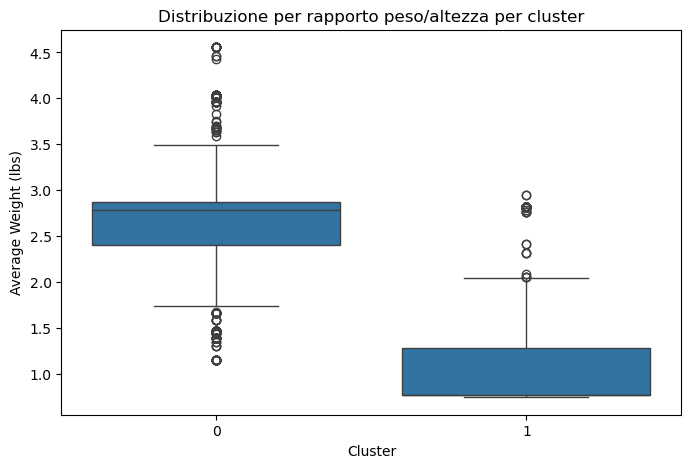

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_numeric['KMeans_LabelK2'], y=df_numeric['weight_height_ratio'])
plt.xlabel('Cluster')
plt.ylabel('Average Weight (lbs)')
plt.title('Distribuzione per rapporto peso/altezza per cluster')
plt.show()


In [51]:
df_numeric.columns

Index(['breed_min_life_expectancy2', 'breed_max_life_expectancy2', 'dog_age',
       'length_of_stay', 'playfulness2', 'good_with_children2',
       'good_with_other_dogs2', 'shedding2', 'grooming2', 'drooling2',
       'coat_length2', 'good_with_strangers2', 'protectiveness2',
       'trainability2', 'energy2', 'barking2', 'breed_avg_weight2',
       'breed_avg_height2', 'weight_height_ratio', 'KMeans_LabelK2'],
      dtype='object')

Non ci sono segmentazioni per l'outcome type nè per la razza 

In [52]:
pd.crosstab(df['outcome_type'], df_numeric['KMeans_LabelK2']) 


KMeans_LabelK2,0,1
outcome_type,,
Adoption,716,259
Died,27,10
Disposal,0,1
Euthanasia,369,88
Missing,5,2
Return to Owner,154,34
Rto-Adopt,1,0
Transfer,1890,931


In [53]:
pd.crosstab(df['Mixed_breed'], df_numeric['KMeans_LabelK2']) 

KMeans_LabelK2,0,1
Mixed_breed,,
0,204,126
1,2958,1199


L'analisi PCA mostra una separazione tra i cluster, suggerendo che la distinzione tra cani piccoli e cani medio-grandi è ben catturata dalle prime due componenti principali,  altezza e peso potrebbero essere le variabili dominanti nella suddivisione.

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)

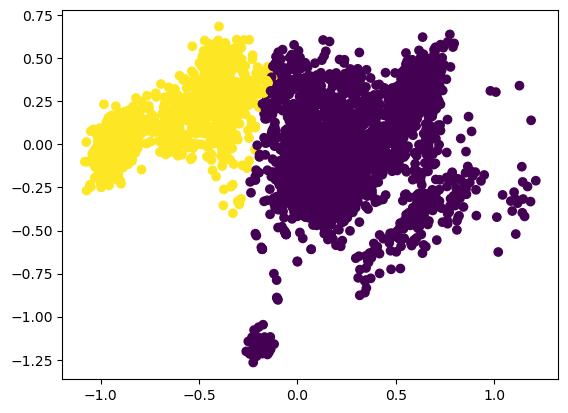

In [56]:
dim1 = 0
dim2 = 1

plt.scatter(X_pca[:, dim1], X_pca[:, dim2], c=df_numeric['KMeans_LabelK2'])

plt.show()

 La rappresentazione t-SNE conferma la netta separazione tra i cluster, evidenziando come le differenze tra cani di taglia piccola e medio-grande siano strutturate nei dati, con una distribuzione più complessa rispetto alla PCA, suggerendo possibili sottogruppi interni.

In [57]:
from sklearn.manifold import TSNE

In [58]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X1)

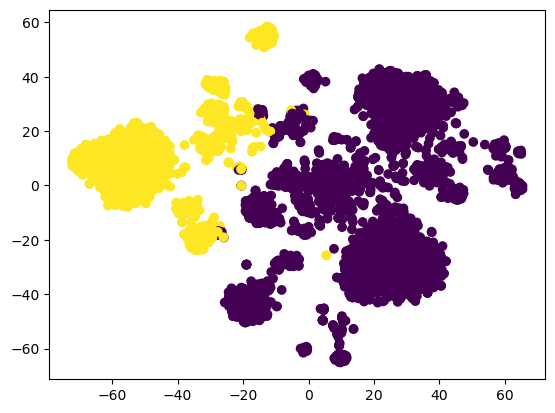

In [59]:
dim1 = 0
dim2 = 1

plt.scatter(X_tsne[:, dim1], X_tsne[:, dim2], c=df_numeric['KMeans_LabelK2'])

plt.show()

Dopo aver compleato i notebook sulla classification e la regression ho provato a usare il datset delle variabili log trasformate ma i risultati sono peggiori  rispetto al K-Means eseguito in precedenza, c'è un peggioramento del silhouette score.

Non ho proseguito oltre col tentativo, nè ho  provato ad adoperare questo dataframe con gli algortimi nelle sezioni successive per via delle loro caratteristiche.

In [60]:
df2 = pd.read_csv('versionepulitalog.csv', skipinitialspace=True)



In [61]:
df_numeric2=df2.drop(columns=['Mixed_breed',
       'breed_category_encoded', 'outcome_encoded'])


In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_log=df_numeric2.values


In [63]:
X_log


array([[3.1916884 , 2.62509962, 3.61537435, ..., 1.17599895, 0.08047465,
        0.15764749],
       [3.916796  , 5.83520347, 2.92554177, ..., 1.31058254, 0.08463349,
        0.1748131 ],
       [3.57702748, 2.54491959, 4.31461199, ..., 0.57054486, 0.01413292,
        2.20380423],
       ...,
       [4.2772752 , 3.69883477, 3.03821873, ..., 1.26923781, 0.01107242,
        0.69960743],
       [3.85423367, 3.33953632, 0.89235731, ..., 1.33255009, 0.02759888,
        2.42437363],
       [3.53663429, 3.67983232, 1.86546718, ..., 1.33255009, 0.08430128,
        1.06091872]])

In [64]:
scaler.fit(X_log)

MinMaxScaler()

In [65]:
X1_log = scaler.transform(X_log)


In [66]:
X1_log

array([[0.44644281, 0.36018893, 0.5039917 , ..., 0.53350622, 0.05399727,
        0.05189147],
       [0.54863055, 0.80243564, 0.40776188, ..., 0.64999412, 0.05678786,
        0.05759815],
       [0.50074775, 0.34914275, 0.6015335 , ..., 0.00945958, 0.00948192,
        0.73213384],
       ...,
       [0.59943205, 0.50811431, 0.42348002, ..., 0.61420847, 0.00742832,
        0.2320654 ],
       [0.53981378, 0.4586148 , 0.12413804, ..., 0.66900798, 0.01851759,
        0.80546187],
       [0.49505523, 0.50549639, 0.25988429, ..., 0.66900798, 0.05656494,
        0.35218291]])

In [67]:
from sklearn.cluster import KMeans
k_min = 2
k_max = 50

k_values = np.arange(k_min, k_max)
sse_values = list()

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X1_log)
    sse_values.append(kmeans.inertia_)


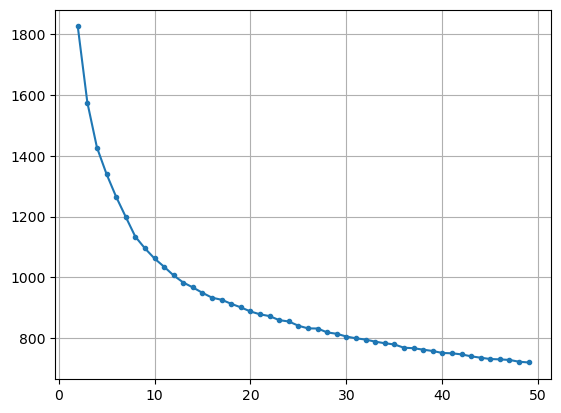

In [68]:
plt.plot(k_values, sse_values, marker='.')
plt.grid()
plt.show()


Il gomito in questo caso ai aggira intorno sempre intorno  a 2  e circa 10

Numero di cluster: 2, Silhouette Score: 0.25073158439182053
Numero di cluster: 3, Silhouette Score: 0.19226827703214658
Numero di cluster: 4, Silhouette Score: 0.18935077227804245
Numero di cluster: 5, Silhouette Score: 0.1792579545447881
Numero di cluster: 6, Silhouette Score: 0.1796936025179816
Numero di cluster: 7, Silhouette Score: 0.18776879841284758
Numero di cluster: 8, Silhouette Score: 0.19600804450581932
Numero di cluster: 9, Silhouette Score: 0.18675086045241948
Numero di cluster: 10, Silhouette Score: 0.15756524557824556


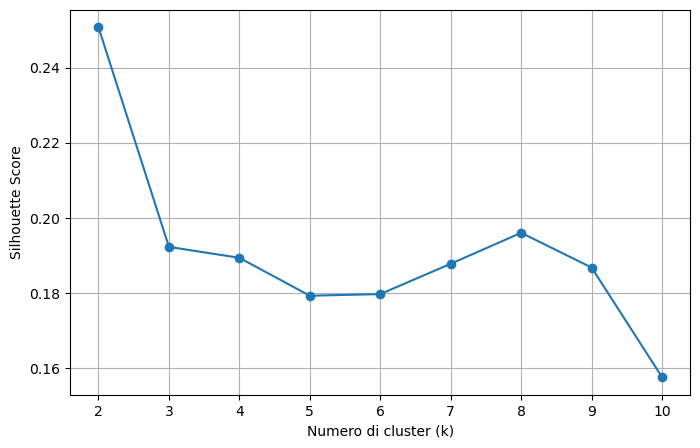

In [69]:

k_values = range(2, 11) 
silhouette_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X1_log)  
    score = silhouette_score(X1_log, labels)
    silhouette_scores.append(score)
    print('Numero di cluster: {}, Silhouette Score: {}'.format(k,score))



plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()




## Density-based
- choose the correct parameters
- evaluate quantitatively and qualitatively

In [70]:
from sklearn.cluster import DBSCAN

In [71]:
from scipy.spatial.distance import pdist, squareform

In [72]:
from sklearn.metrics import silhouette_score

Il criterio di scelta dei min points è stato arbitrario

In [73]:
list_of_min_pts_th_distances = list()
for min_pts in [4, 8, 16, 32, 64]:

    D = squareform(pdist(X))

    min_pts_th_distances = list()

    for i in range(len(X)):
        min_pts_th_distances.append(sorted(D[i])[min_pts+1])
    
    list_of_min_pts_th_distances.append(min_pts_th_distances)

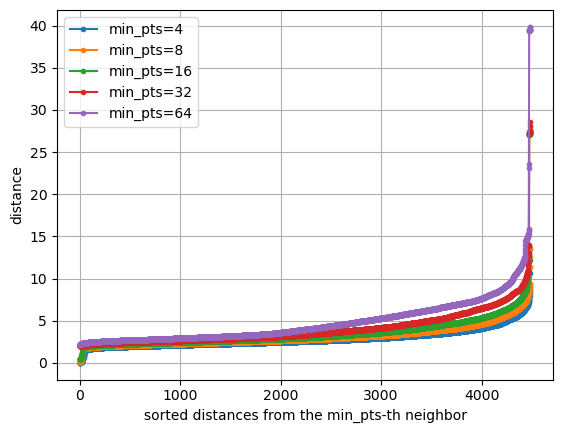

In [74]:
for i, min_pts in enumerate([4, 8, 16, 32, 64]):
    min_pts_th_distances = list_of_min_pts_th_distances[i]
    plt.plot(np.arange(len(X)), sorted(min_pts_th_distances), marker='.', label='min_pts=%s' % min_pts)

    plt.grid()
plt.legend()
plt.xlabel('sorted distances from the min_pts-th neighbor')
plt.ylabel('distance')
plt.show()

I valori di min points come 8 e 16 sembrano essere più stabili e contenere più core points su distanze comprese inotorno al 3 e al 5 per  min points=8 e tra il 5 e il 7 per min points=16

I tentativi con min samples = 16 non hanno fornito un silhouette score calcolabile

In [75]:
dbscan = DBSCAN(eps=5, min_samples=16) 
dbscan.fit(X1)

DBSCAN(eps=5, min_samples=16)

In [76]:
df_numeric['DBSCAN_Labels16'] = dbscan.labels_

In [77]:
valid_idx = df_numeric['DBSCAN_Labels16'] != -1  
X_valid = X1[valid_idx]  
labels_valid = df_numeric.loc[valid_idx, 'DBSCAN_Labels16']  

num_clusters = len(set(labels_valid))

if num_clusters > 1:
    sil_score = silhouette_score(X_valid, labels_valid)
    print('Silhouette Score: {}'.format(sil_score))
else:
    print('Errore: DBSCAN ha trovato solo 1 cluster, silhouette score non calcolabile.')

Errore: DBSCAN ha trovato solo 1 cluster, silhouette score non calcolabile.


In [78]:
dbscan = DBSCAN(eps=6, min_samples=16) 
dbscan.fit(X1)

DBSCAN(eps=6, min_samples=16)

In [79]:
valid_idx = df_numeric['DBSCAN_Labels16'] != -1  
X_valid = X1[valid_idx]  
labels_valid = df_numeric.loc[valid_idx, 'DBSCAN_Labels16']  

num_clusters = len(set(labels_valid))

if num_clusters > 1:
    sil_score = silhouette_score(X_valid, labels_valid)
    print('Silhouette Score: {}'.format(sil_score))
else:
    print('Errore: DBSCAN ha trovato solo 1 cluster, silhouette score non calcolabile.')

Errore: DBSCAN ha trovato solo 1 cluster, silhouette score non calcolabile.


Ho provato ad automatizzare la ricerca di eps e min points ottimale imponendo la condizione che  che ci debba essere più di un cluster

In [80]:
%%time

best_score = -1
best_min_samples = None
best_eps = None


min_samples_range = range(3, 25, 1)  
eps_values = np.linspace(0.5, 6.0, 30)  

for min_samples in min_samples_range:
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X1)
        labels = dbscan.labels_

        
        if len(set(labels) - {-1}) < 2:
            continue
        
        score = silhouette_score(X1, labels)  

        if score > best_score:
            best_score = score
            best_min_samples = min_samples
            best_eps = eps

print('Best min_samples: {}, Best eps: {}, Best silhouette score: {}'.format(best_min_samples,best_eps,best_score))

Best min_samples: 20, Best eps: 0.5, Best silhouette score: 0.09878868267317084
CPU times: total: 30min 49s
Wall time: 11min 51s


In [81]:
dbscan_model_20 = DBSCAN(eps=0.5, min_samples=20)
dbscan_model_20.fit(X1)



DBSCAN(min_samples=20)

In [82]:
dbscan_labels = dbscan_model_20.labels_
unique_dbscan_labels, cluster_counts = np.unique(dbscan_labels, return_counts=True)
num_valid_clusters = len(unique_dbscan_labels) - (1 if -1 in unique_dbscan_labels else 0)

print('Numero totale di cluster (escluso rumore): {}'.format(num_valid_clusters))

for i, label in enumerate(unique_dbscan_labels):
    if label == -1:
        print('Rumore: {} punti ({}%)'.format(cluster_counts[i], round(cluster_counts[i] / len(X1) * 100, 2)))
    else:
        print('Cluster {}: {} punti ({}%)'.format(label, cluster_counts[i], round(cluster_counts[i] / len(X1) * 100, 2)))


Numero totale di cluster (escluso rumore): 2
Rumore: 316 punti (7.04%)
Cluster 0: 4147 punti (92.42%)
Cluster 1: 24 punti (0.53%)


In [83]:
df_numeric['DBSCAN_Labels20'] = dbscan.labels_

In [84]:
valid_idx = df_numeric['DBSCAN_Labels20'] != -1  
X_valid = X1[valid_idx]  
labels_valid = df_numeric.loc[valid_idx, 'DBSCAN_Labels20']  

num_clusters = len(set(labels_valid))

if num_clusters > 1:
    sil_score = silhouette_score(X_valid, labels_valid)
    print('Silhouette Score: {}'.format(sil_score))
else:
    print('Errore: DBSCAN ha trovato solo 1 cluster, silhouette score non calcolabile.')

Errore: DBSCAN ha trovato solo 1 cluster, silhouette score non calcolabile.


Escludendo il rumore si osserva  l'imposibilità di  calcolore il silhouette score anche in questo caso il cluster è sbilanciato, nel cluster 0 ho molti più punti e i punti di rumore sono più numerosi rispetto a i punti del cluster 2.

Dopo questo tentativo senza risultato, consultando una serie forum e siti del settore, ho scoperto  che per determinare l'eps ottimale è possibile utilizzare KNN


https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan

https://stataiml.com/posts/how_to_set_dbscan_paramter/

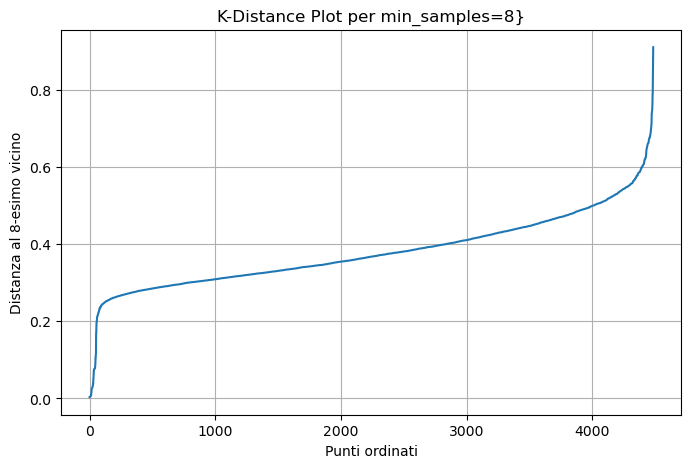

In [85]:
from sklearn.neighbors import NearestNeighbors
min_samples_test = 8  
neighbors = NearestNeighbors(n_neighbors=min_samples_test)
neighbors_fit = neighbors.fit(X1)
distances, indices = neighbors_fit.kneighbors(X1)

distances = np.sort(distances[:, -1])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-Distance Plot per min_samples=8}')
plt.xlabel('Punti ordinati')
plt.ylabel('Distanza al 8-esimo vicino')
plt.grid()
plt.show()

In [86]:
dbscan = DBSCAN(eps=0.6, min_samples=8)  
dbscan_labels_ = dbscan.fit_predict(X1)


num_clusters = len(set(dbscan_labels_)) - (1 if -1 in dbscan_labels_ else 0)
print('DBSCAN ha trovato {} cluster.'.format(num_clusters))


n_noise = np.sum(dbscan_labels_ == -1)
print(f"Numero di punti di rumore: {n_noise}")

DBSCAN ha trovato 2 cluster.
Numero di punti di rumore: 23


In [87]:
labels, counts = np.unique(dbscan.labels_, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))

Noise: 23 (0.01)
Cluster 0: 4439 (0.99)
Cluster 1: 25 (0.01)


In [88]:
idx_valid = dbscan_labels_ != -1
X_valid = X1[idx_valid]
labels_valid = dbscan_labels[idx_valid]

if len(set(labels_valid)) > 1:
    score = silhouette_score(X_valid, labels_valid)
    print('Silhouette Score: {}'.format(score))
else:
    print('Silhouette Score non disponibile: DBSCAN ha trovato un solo cluster.')

Silhouette Score: 0.09366240646774618


In [89]:
df_numeric['DBSCAN_Labels8'] = dbscan.labels_

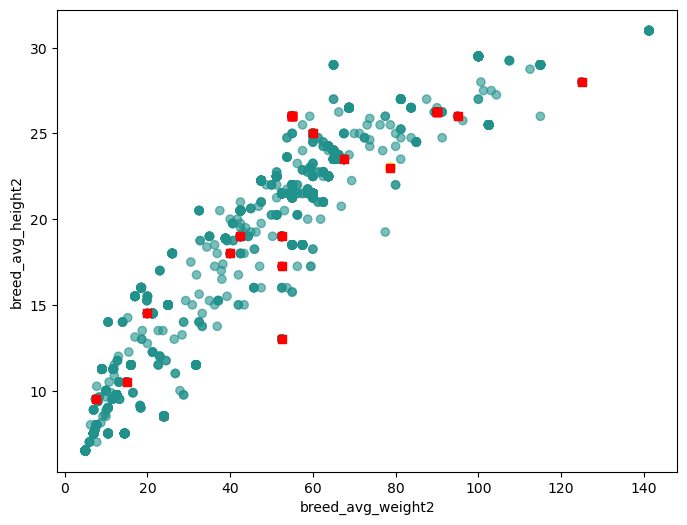

In [90]:
x = 'breed_avg_weight2'
y = 'breed_avg_height2'

idx_core = dbscan.core_sample_indices_
idx_noise = df_numeric['DBSCAN_Labels8'].values == -1

plt.figure(figsize=(8,6))
plt.scatter(df_numeric[x], df_numeric[y], c=df_numeric['DBSCAN_Labels8'], cmap='viridis', alpha=0.6)
plt.scatter(df_numeric[x][idx_noise], df_numeric[y][idx_noise], c='red', marker='s', label='Noise')

plt.xlabel(x)
plt.ylabel(y)
plt.show()

Dal grafico sembra esserci un solo cluster  predominante con alcuni punti di rumore  e questo è in linea col fatto che il 99%  dei punti si trova nel cluster 0 e lo 0.01% nel cluster 1

In [91]:
df_numeric.head()

,breed_min_life_expectancy2,breed_max_life_expectancy2,dog_age,length_of_stay,playfulness2,good_with_children2,good_with_other_dogs2,shedding2,grooming2,drooling2,...,trainability2,energy2,barking2,breed_avg_weight2,breed_avg_height2,weight_height_ratio,KMeans_LabelK2,DBSCAN_Labels16,DBSCAN_Labels20,DBSCAN_Labels8
0,10.0,13.0,0.170753,0.083801,3.191688,2.625100,3.615374,3.506990,0.365627,0.218111,...,2.873580,4.167703,1.974363,65.0,29.00,2.241379,0,0,0,0
1,10.0,12.0,0.191024,0.088318,3.916796,5.835203,2.925542,1.663397,2.324304,3.481632,...,3.010407,4.231642,2.737943,65.0,24.00,2.708333,0,0,0,0
2,14.0,16.0,8.059412,0.014233,3.577027,2.544920,4.314612,3.359707,0.217080,0.000000,...,1.832087,2.834511,5.015286,5.0,6.50,0.769231,1,0,0,0
3,12.0,16.0,9.023539,0.016787,2.203599,2.835409,2.936067,3.165869,2.045838,0.475766,...,3.482516,2.037904,3.420557,5.0,6.50,0.769231,1,0,0,0
4,10.0,18.0,1.026486,0.011556,3.094009,4.391545,4.955892,0.172306,3.903627,0.360951,...,4.698562,2.944130,2.754888,12.5,9.75,1.282051,1,0,0,0


Quest'ultimo tentativo è risultato essere il migliore

Nonostante gli svariati tentativi, i silhouette scores ottenuti sono bassi o non calcolabili rispetto a quelli del K-Means.
I cluster invidiuabili non sono mai più di uno e in caso contrario sono fortemente sbilanciati.

Inoltre sia automatizzando la ricerca sia  con KNN l' epsilon ottimale converge intorno a valori compresi tra 0.5 e 0.6.

Il DBSCAN non sembra essere l'algortimo migliore per segementare i dati a disposizione.

Molto probabilmente i dati hanno un raggruppamento naturale, ad esempio per taglia dei cani, che viene colto meglio da un algortimo center-based  come il K-Means.

Scegliendo come termine di paragone le etichette del DBSCAN  con il risultato più accettabile ho eseguito una serie di confronti qualitativi con l'outcome_type, la razza con breed_category.

Successivamente ho eseguito PCA e t-SNE.

In [92]:
pc = pd.crosstab(df['breed_category'],df_numeric['DBSCAN_Labels8'])
pc

DBSCAN_Labels8,-1,0,1
breed_category,,,
American Bulldog Mix,1,0,23
American Staffordshire Terrier Mix,0,22,0
Anatol Shepherd Mix,0,29,0
Australian Cattle Dog Mix,1,119,0
Australian Kelpie Mix,0,21,0
Australian Shepherd Mix,0,52,0
Beagle Mix,0,46,0
Border Collie Mix,0,63,0
Boxer Mix,0,81,0


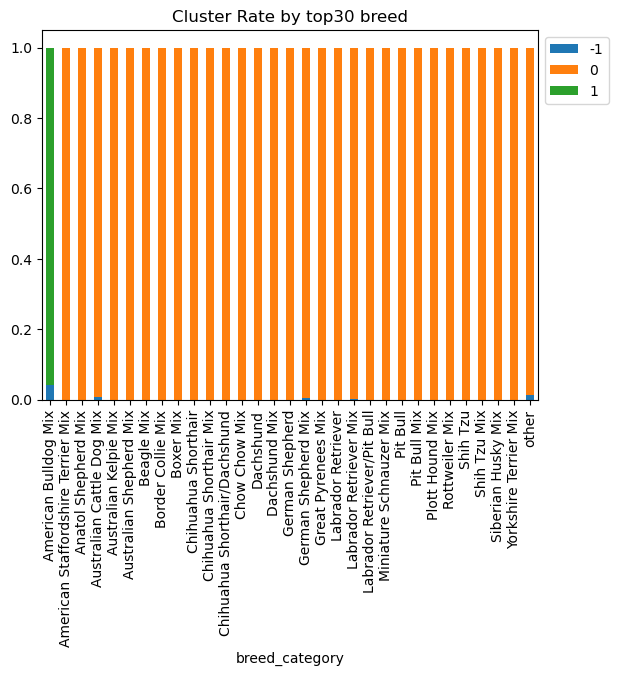

In [93]:
x='Cluster'
y= 'top30 breed'


pc = pd.crosstab(df['breed_category'],df_numeric['DBSCAN_Labels8'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

La maggior parte delle razze si concentra nel cluster 0, tranne gli American Bulldog Mix nel cluster 1 e un esemplare  nei punti di rumore con alcuni esemplari rari, un German Shepherd Mix, un Labrador Retriever Mix e un Australian Cattle Dog Mix

In [94]:
pc = pd.crosstab( df_numeric['DBSCAN_Labels8'],df['breed_category'])
pc

breed_category,American Bulldog Mix,American Staffordshire Terrier Mix,Anatol Shepherd Mix,Australian Cattle Dog Mix,Australian Kelpie Mix,Australian Shepherd Mix,Beagle Mix,Border Collie Mix,Boxer Mix,Chihuahua Shorthair,...,Miniature Schnauzer Mix,Pit Bull,Pit Bull Mix,Plott Hound Mix,Rottweiler Mix,Shih Tzu,Shih Tzu Mix,Siberian Husky Mix,Yorkshire Terrier Mix,other
DBSCAN_Labels8,,,,,,,,,,,,,,,,,,,,,
-1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
0,0,22,29,119,21,52,46,63,81,32,...,45,24,701,40,33,26,59,38,43,1300
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


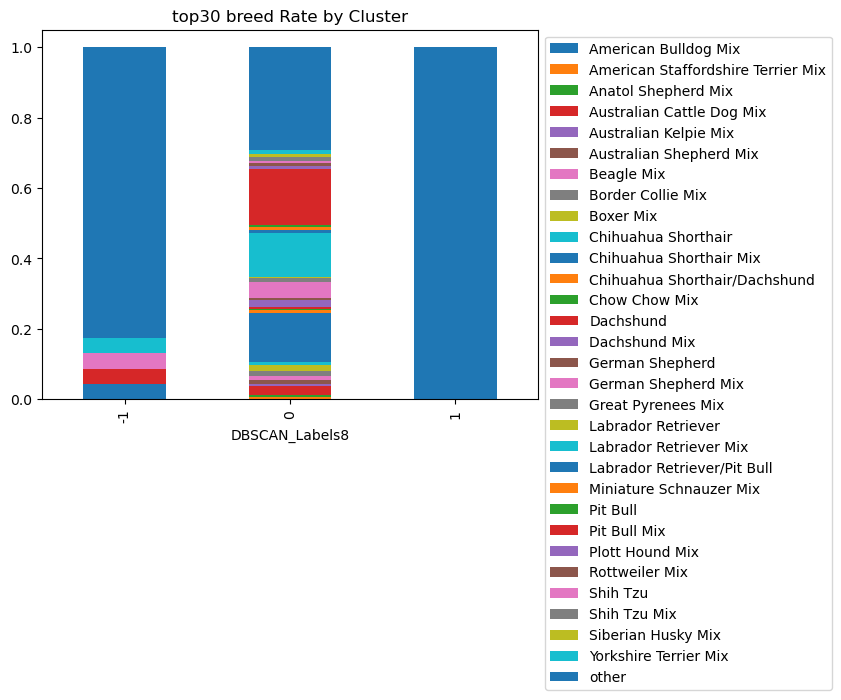

In [95]:
x='top30 breed'
y= 'Cluster'

pc = pd.crosstab( df_numeric['DBSCAN_Labels8'],df['breed_category'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Anche questa rappresentazione conferma Il pattern evidenziato in precedenza

In [96]:
pd.crosstab(df['outcome_type'], df_numeric['DBSCAN_Labels8'])

DBSCAN_Labels8,-1,0,1
outcome_type,,,
Adoption,7,963,5
Died,0,37,0
Disposal,0,1,0
Euthanasia,1,454,2
Missing,0,7,0
Return to Owner,2,186,0
Rto-Adopt,0,1,0
Transfer,13,2790,18


Non c'è una particolare segmentazione rispetto all'outcome

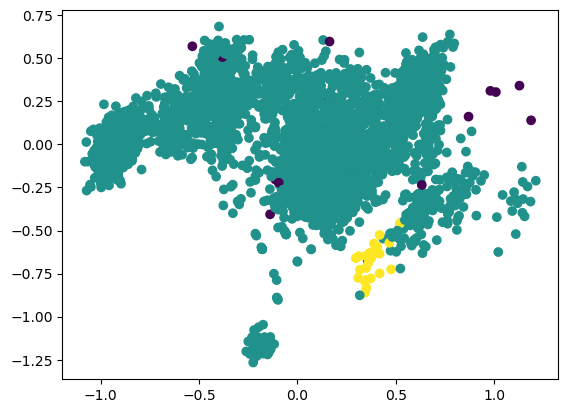

In [97]:
dim1 = 0
dim2 = 1

plt.scatter(X_pca[:, dim1], X_pca[:, dim2], c=df_numeric['DBSCAN_Labels8'])

plt.show()

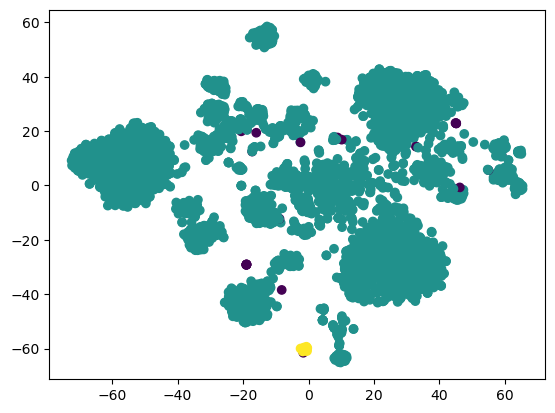

In [98]:
dim1 = 0
dim2 = 1

plt.scatter(X_tsne[:, dim1], X_tsne[:, dim2], c=df_numeric['DBSCAN_Labels8'])

plt.show()

PCA E t-SNE confermano sempre che la segmetanzione tramite DBSCAN non è ottimale per il tipo di dati.

Il cluster 0 è quello più esteso.

## Hierarchical
- choose the correct parameters
- show and discuss different dendograms using different algorithms
- evaluate quantitatively and qualitatively

In [99]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Ho scelto la distanza euclidea come metrica per questa analisi perché si adatta bene ai dati, che sono stati normalizzati con Min-Max Scaler, perchè 

è particolarmente efficace con il metodo Ward,e si comporta  in modo coerente anche con altri metodi di linkage come Average, Complete e Single, garantendo un confronto ottimale tra i 

quattro metodi di segmentazione.

In [100]:
D = pdist(X1, metric='euclidean') 

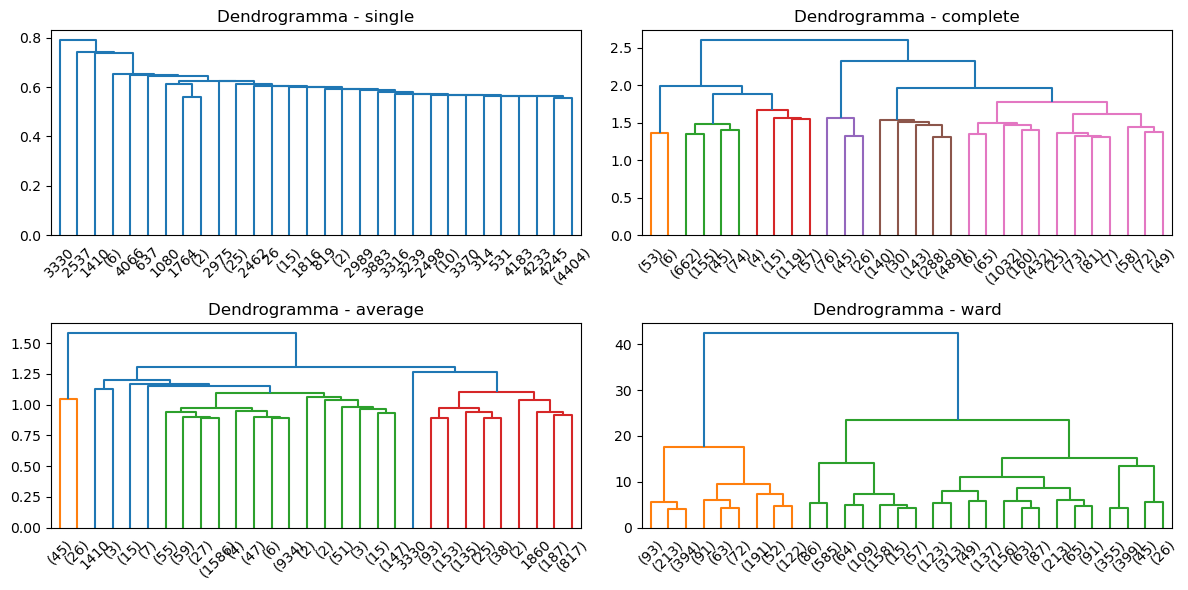

In [101]:
methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(12, 6))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    link_matrix = linkage(D, method=method)
    dendrogram(link_matrix, truncate_mode='lastp', p=30)
    plt.title('Dendrogramma - {}'.format(method))

plt.tight_layout()
plt.show()

Osservando l'omogeneità dei cluster generati con i metodi Ward e Complete linkage e Average tagli potrebbero avvenire a t=2, t=3 o  t=4 

In [102]:
methods = ['ward', 'complete', 'average', 'single']
T_values = range(2, 8)
silhouette_scores = {method: [] for method in methods}

for method in methods:
    link_matrix = linkage(D, method=method)
    for T in T_values:
        labels = fcluster(link_matrix, T, criterion='maxclust')
        if len(set(labels)) > 1:
            score = silhouette_score(X1, labels)
            silhouette_scores[method].append(score)
        else:
            silhouette_scores[method].append(None)



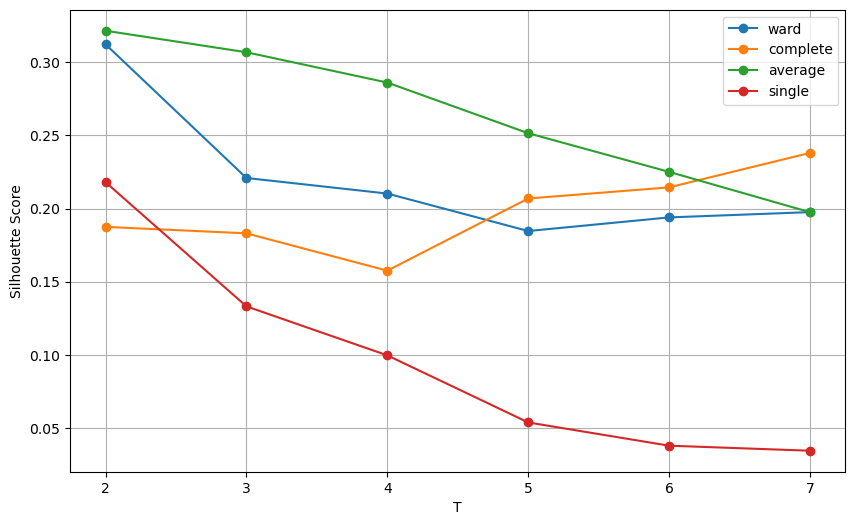

In [103]:
plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(T_values, silhouette_scores[method], marker='o', linestyle='-', label=method)

plt.xlabel('T')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

Il T più adatto potrebbe essere intorno a 2 . 

Single ha gli score peggiori, Average e Ward hanno dei punteggi simili intorno al 0.30 con t=2. 

Con t=3  Avarage e ha un leggero decremento e Ward uno maggiore.

Con single provo solo 2 perchè già dall'andamento del silhouette score si nota che è la scelta peggiore per il tipo di dati che ho a disposizione, risente molto degli outliers

Cluster 1: 4486 (1.00)
Cluster 2: 1 (0.00)


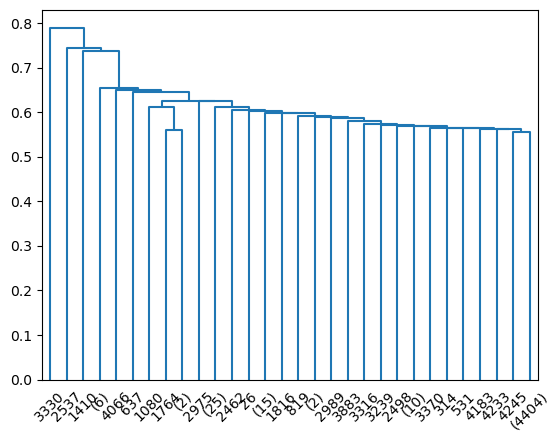

In [104]:
link_s = linkage(D, method='single', metric='euclidean')
res = dendrogram(link_s, truncate_mode='lastp')
agg_labels_s = fcluster(link_s, t=2, criterion='maxclust')
labels, counts = np.unique(agg_labels_s, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))


I cluster con Single  sono fortemente sbilanciati a livello numerico

Cluster 1: 1190 (0.27)
Cluster 2: 3297 (0.73)


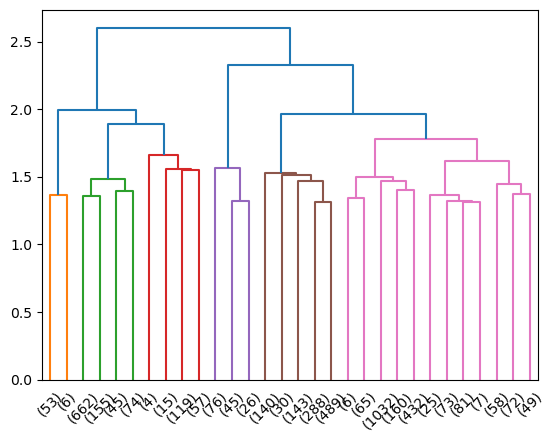

In [105]:
link_c2 = linkage(D, method='complete', metric='euclidean')
res2 = dendrogram(link_c2, truncate_mode='lastp')
agg_labels_c2 = fcluster(link_c2, t=2, criterion='maxclust')
labels, counts = np.unique(agg_labels_c2, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))

Cluster 1: 1190 (0.27)
Cluster 2: 147 (0.03)
Cluster 3: 3150 (0.70)


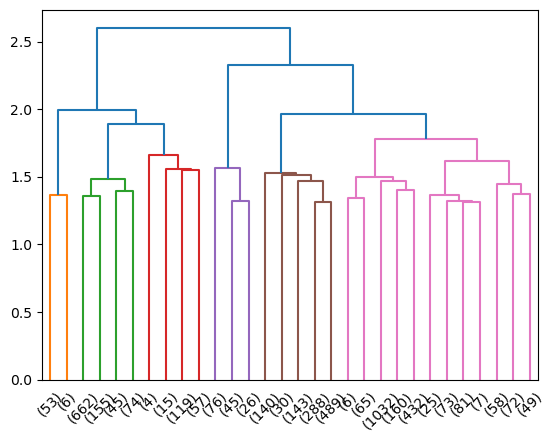

In [106]:
link_c = linkage(D, method='complete', metric='euclidean')
res = dendrogram(link_c, truncate_mode='lastp')
agg_labels_c = fcluster(link_c, t=3, criterion='maxclust')
labels, counts = np.unique(agg_labels_c, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))

Per Complete t=2 sembra la scelta migliore, ma ha più punti nel cluster 1 rispetto al cluster 2 e dall'andamento del silhouette score si evince che non è un metodo ottimale per segmentare i dati che ho a disposizione

Cluster 1: 1291 (0.29)
Cluster 2: 3196 (0.71)


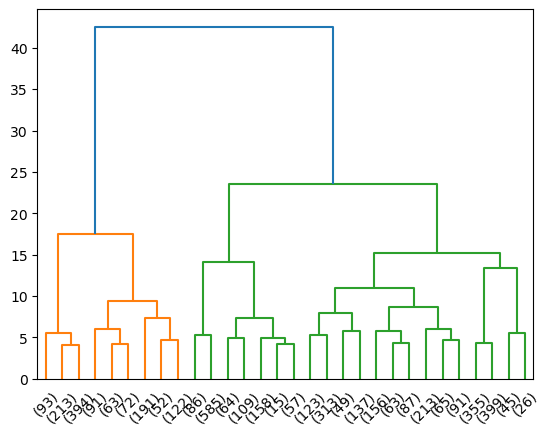

In [107]:
link_w2 = linkage(D, method='ward', metric='euclidean')
res2 = dendrogram(link_w2, truncate_mode='lastp')
agg_labels_w2 = fcluster(link_w2, t=2, criterion='maxclust')
labels, counts = np.unique(agg_labels_w2, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))

Il cluster con t=2 è sbilanciato a livello numerico, ma questa suddivisione potrebbe riflettere la segmentazione per taglia grande e piccola individuata nelle sezioni precedenti

Cluster 1: 1291 (0.29)
Cluster 2: 1074 (0.24)
Cluster 3: 2122 (0.47)


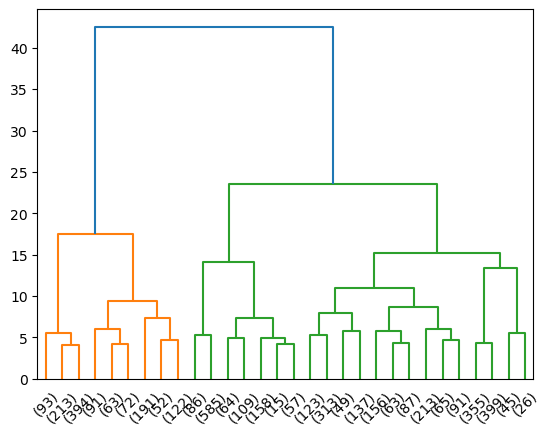

In [108]:
link_w = linkage(D, method='ward', metric='euclidean')
res = dendrogram(link_w, truncate_mode='lastp')
agg_labels_w = fcluster(link_w, t=3, criterion='maxclust')
labels, counts = np.unique(agg_labels_w, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))

Ward con t=3 ha i cluster più bilanciati  sia a livello numerico che grafico rispetto ai metodi precedenti

Cluster 1: 71 (0.02)
Cluster 2: 4416 (0.98)


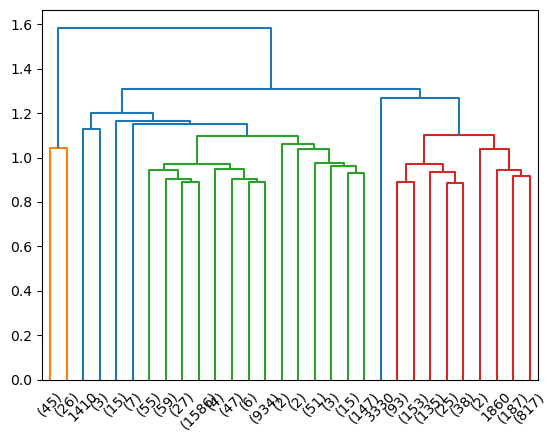

In [109]:
link_a2 = linkage(D, method='average', metric='euclidean')
res2 = dendrogram(link_a2, truncate_mode='lastp')
agg_labels_a2 = fcluster(link_a2, t=2, criterion='maxclust')
labels, counts = np.unique(agg_labels_a2, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))


Cluster 1: 71 (0.02)
Cluster 2: 2964 (0.66)
Cluster 3: 1452 (0.32)


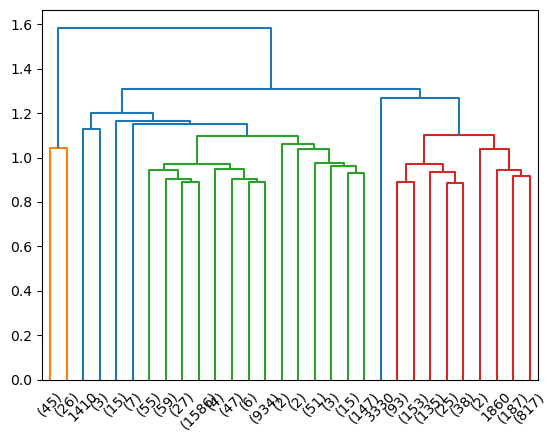

In [110]:
link_a = linkage(D, method='average', metric='euclidean')
res = dendrogram(link_a, truncate_mode='lastp')
agg_labels_a = fcluster(link_a, t=3, criterion='maxclust')
labels, counts = np.unique(agg_labels_a, return_counts=True)
for i, l in enumerate(labels):
    if l == -1:
        print('Noise: %s (%.2f)' % (counts[i], counts[i]/len(X1)))
    else:
        print('Cluster %s: %s (%.2f)' % (l, counts[i], counts[i]/len(X1)))


Con t=2 Average ha cluster fortmente sbilanciati  a livello di numerosità. 

Con t= 3 il nuovo cluster suddivide il cluster più numeroso ma lascia il cluster 1 con un forte sbilanciamento rispetto agli altri

Per un confronto più dettagliato ho generato i valori numerici dei Silhouete Score con t=2 e t=3

In [111]:
from sklearn.metrics import silhouette_score

In [112]:
methods = ['single', 'complete', 'average', 'ward']
silhouette_scores = []

for method in methods:
    link = linkage(D, method=method, metric='euclidean')
    labels = fcluster(link, t=2, criterion='maxclust')  
    score = silhouette_score(X1, labels)
    silhouette_scores.append(score)
    print('Method: {}, Silhouette Score: {}'.format(method,score))


Method: single, Silhouette Score: 0.21806731280207087
Method: complete, Silhouette Score: 0.18748566857714016
Method: average, Silhouette Score: 0.32157599691320893
Method: ward, Silhouette Score: 0.3123162466656953


Con t=2  Ward e Complete hanno un punteggio più solido

In [113]:
methods = ['single', 'complete', 'average', 'ward']
silhouette_scores = []

for method in methods:
    link = linkage(D, method=method, metric='euclidean')
    labels = fcluster(link, t=3, criterion='maxclust')  #
    score = silhouette_score(X1, labels)
    silhouette_scores.append(score)
    print('Method: {}, Silhouette Score: {}'.format(method,score))


Method: single, Silhouette Score: 0.13314414933264215
Method: complete, Silhouette Score: 0.18305906602386873
Method: average, Silhouette Score: 0.3068609678257369
Method: ward, Silhouette Score: 0.220904259582569


Con t=3  Complete descresce meno rispetto a Ward che crolla.

Average aumenta

Per capire quale metodo sia il più ottimale ho eseguito  PCA e t-SNE con  Ward e  Average a t=2 e t=3

In [114]:
df_numeric['Hierarchical_single_labels'] = agg_labels_s

In [115]:
df_numeric['Hierarchical_complete_labels2'] = agg_labels_c2

In [116]:
df_numeric['Hierarchical_complete_labels'] = agg_labels_c

In [117]:
df_numeric['Hierarchical_ward_labels2'] = agg_labels_w2

In [118]:
df_numeric['Hierarchical_ward_labels'] = agg_labels_w

In [119]:
df_numeric['Hierarchical_average_labels2'] = agg_labels_a2

In [120]:
df_numeric['Hierarchical_average_labels'] = agg_labels_a

In [121]:
df_numeric.head()

,breed_min_life_expectancy2,breed_max_life_expectancy2,dog_age,length_of_stay,playfulness2,good_with_children2,good_with_other_dogs2,shedding2,grooming2,drooling2,...,DBSCAN_Labels16,DBSCAN_Labels20,DBSCAN_Labels8,Hierarchical_single_labels,Hierarchical_complete_labels2,Hierarchical_complete_labels,Hierarchical_ward_labels2,Hierarchical_ward_labels,Hierarchical_average_labels2,Hierarchical_average_labels
0,10.0,13.0,0.170753,0.083801,3.191688,2.625100,3.615374,3.506990,0.365627,0.218111,...,0,0,0,1,1,1,2,3,2,2
1,10.0,12.0,0.191024,0.088318,3.916796,5.835203,2.925542,1.663397,2.324304,3.481632,...,0,0,0,1,1,1,2,2,2,2
2,14.0,16.0,8.059412,0.014233,3.577027,2.544920,4.314612,3.359707,0.217080,0.000000,...,0,0,0,1,2,3,1,1,2,3
3,12.0,16.0,9.023539,0.016787,2.203599,2.835409,2.936067,3.165869,2.045838,0.475766,...,0,0,0,1,2,3,1,1,2,3
4,10.0,18.0,1.026486,0.011556,3.094009,4.391545,4.955892,0.172306,3.903627,0.360951,...,0,0,0,1,2,3,1,1,2,3


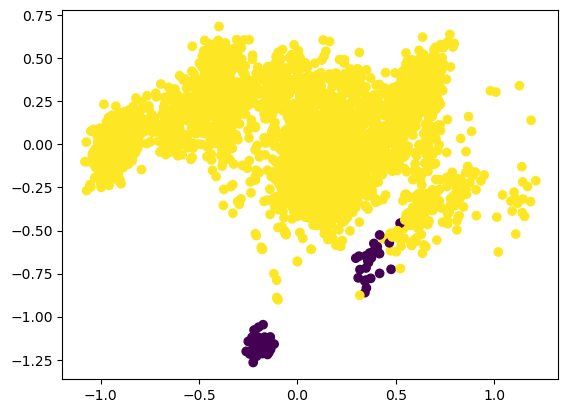

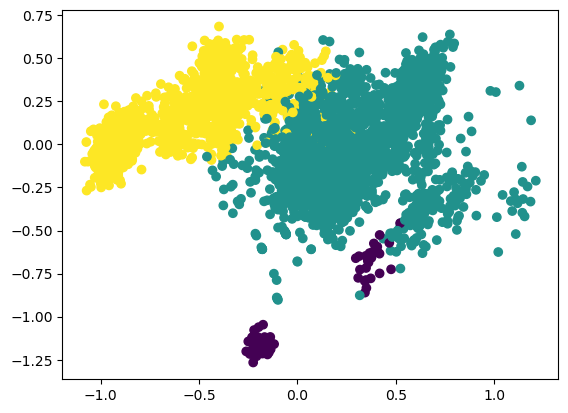

In [122]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_pca[:, dim1], X_pca[:, dim2], c=df_numeric['Hierarchical_average_labels2'])

plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_pca[:, dim1], X_pca[:, dim2], c=df_numeric['Hierarchical_average_labels'])

plt.show()

Con t=2 il clustering suddivide i dati in due gruppi principali, con una chiara separazione tra le due aree di densità, ma con alcune osservazioni isolate che non si adattano perfettamente a nessuno dei due cluster.


Aumentando il numero di cluster, si nota una suddivisione più dettagliata della distribuzione. 
Il cluster unico  che avevo nel grafico precedente viene diviso in due sotto-gruppi, suggerendo che esistano ulteriori differenze tra le osservazioni che non erano evidenti con t=2.

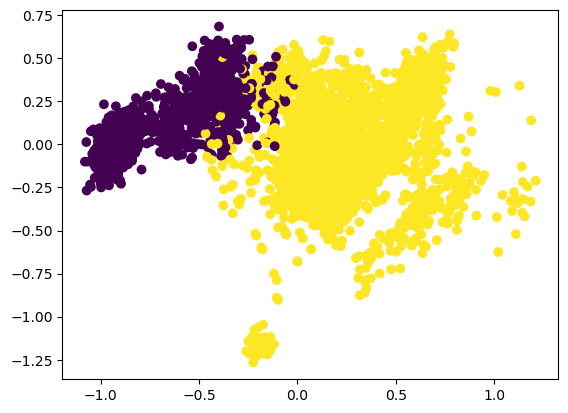

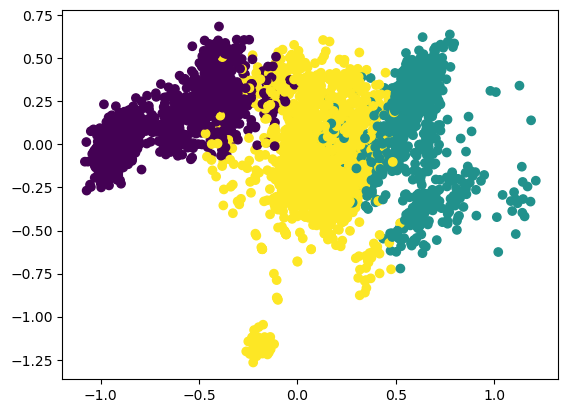

In [123]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_pca[:, dim1], X_pca[:, dim2], c=df_numeric['Hierarchical_ward_labels2'])

plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_pca[:, dim1], X_pca[:, dim2], c=df_numeric['Hierarchical_ward_labels'])

plt.show()

Osservando la PCA, Ward sembrerebbe la scelta migliore, la separazione dei tre cluster si conferma la più bilanciata a livello di numerosità, ma non a livello di distanza come per t=2.

Confrontandolo con Average, sembra che Ward tenda a creare cluster più omogenei e separati, mentre Average mantiene una transizione più fluida tra i gruppi e ciò lo rende meno interpretabile e marcato.

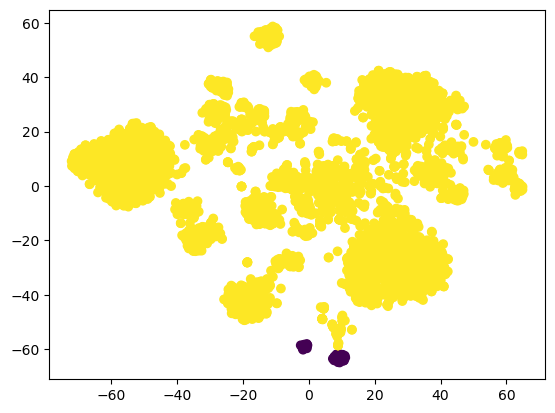

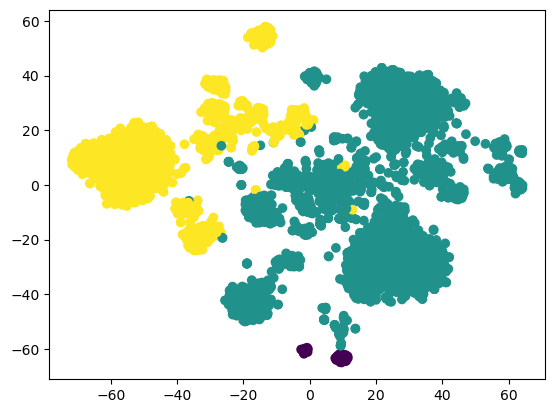

In [124]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_tsne[:, dim1], X_tsne[:, dim2], c=df_numeric['Hierarchical_average_labels2'])

plt.show()



tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_tsne[:, dim1], X_tsne[:, dim2], c=df_numeric['Hierarchical_average_labels'])

plt.show()

Il clustering con t=2  mostra una chiara separazione tra i cluster, ma alcune regioni sembrano più frammentate e meno compatte. I gruppi appaiono ben distribuiti nello spazio bidimensionale, suggerendo che la separazione è guidata da caratteristiche fortemente distintive.

 Con tre cluster, la suddivisione diventa più articolata, con il terzo cluster  che si forma separando una parte del gruppo giallo. 
 
La struttura complessiva del clustering rimane simile, suggerendo che il terzo cluster potrebbe rappresentare una sottocategoria più fine dei dati piuttosto che un gruppo completamente distinto.

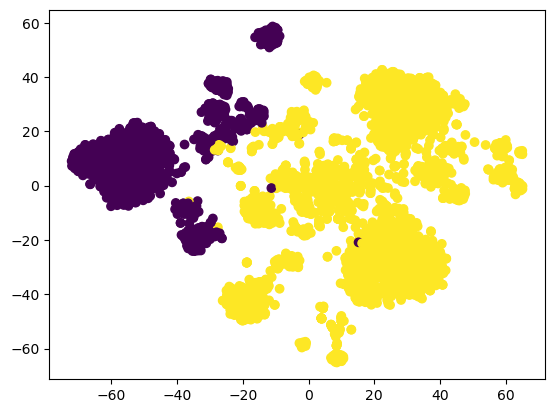

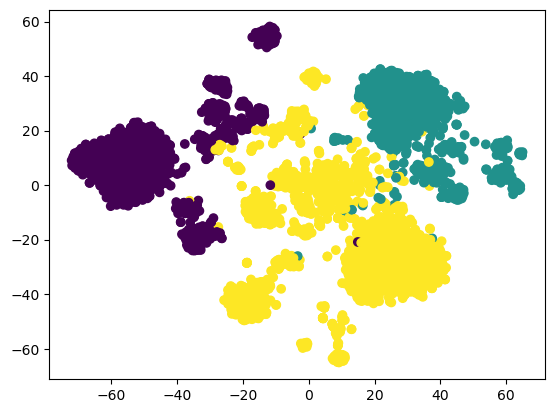

In [125]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_tsne[:, dim1], X_tsne[:, dim2], c=df_numeric['Hierarchical_ward_labels2'])

plt.show()



tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X1)
dim1 = 0
dim2 = 1

plt.scatter(X_tsne[:, dim1], X_tsne[:, dim2], c=df_numeric['Hierarchical_ward_labels'])

plt.show()

Con Ward  la suddivisione in due cluster evidenzia una separazione netta tra due gruppi principali, con una distinzione ben marcata tra le regioni più dense. 

All'interno di ciascun cluster si osservano diverse sottostrutture, suggerendo che una suddivisione più dettagliata potrebbe essere utile.

Con tre cluster, il modello introduce una terza categoria che sembra separare una sottoregione del cluster giallo. 

La struttura dei gruppi rimane simile a quella con due cluster , indicando che Ward ha individuato ulteriori differenze nei dati ma per averne la certezza ho eseguito dei confronti qualitativi.

Nei confronti qualitativi seguenti ho adoperato confronti con  le etichette di Ward e complete a t=2 e t=3 per Ward e Average.

In [126]:
pd.crosstab(df['breed_category'], df_numeric['Hierarchical_ward_labels2']) 

Hierarchical_ward_labels2,1,2
breed_category,,
American Bulldog Mix,0,24
American Staffordshire Terrier Mix,0,22
Anatol Shepherd Mix,0,29
Australian Cattle Dog Mix,0,120
Australian Kelpie Mix,0,21
Australian Shepherd Mix,0,52
Beagle Mix,0,46
Border Collie Mix,0,63
Boxer Mix,0,81


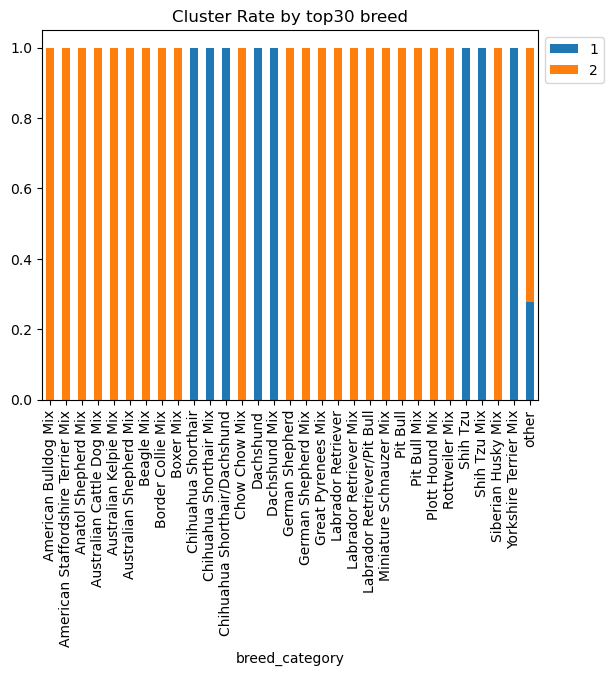

In [127]:
x='Cluster'
y= 'top30 breed'


pc = pd.crosstab(df['breed_category'], df_numeric['Hierarchical_ward_labels2'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

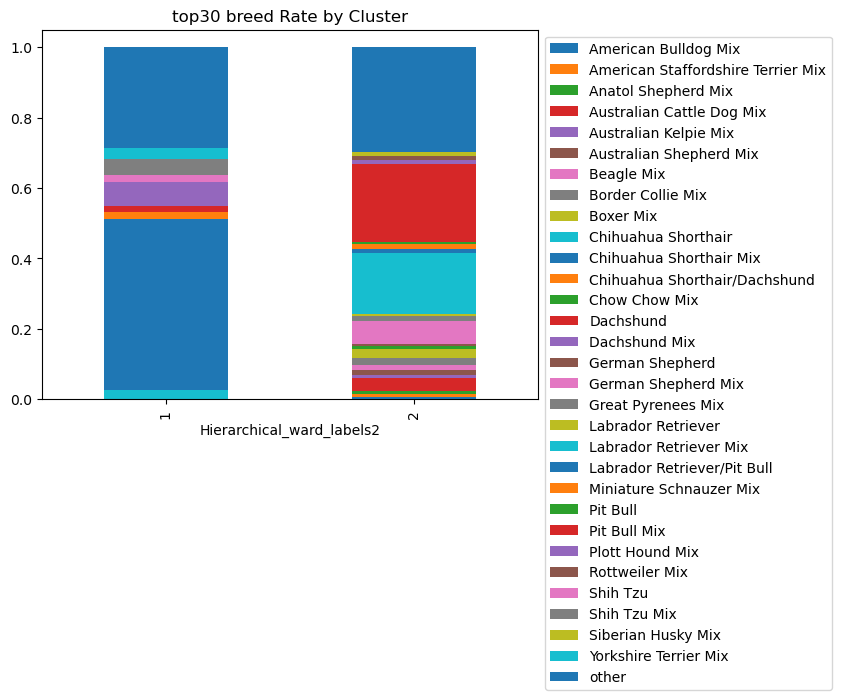

In [128]:
x='top30 breed'
y= 'Cluster'

pc = pd.crosstab( df_numeric['Hierarchical_ward_labels2'],df['breed_category'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Per Ward la seprazione con t=2 è più netta tra cani di taglia piccola e grande. 

Nel Cluster 1 ci sono principalmente razze di cani di piccola taglia e nel 2 le medie-grandi

In [129]:
pd.crosstab(df['breed_category'], df_numeric['Hierarchical_ward_labels']) 

Hierarchical_ward_labels,1,2,3
breed_category,,,
American Bulldog Mix,0,0,24
American Staffordshire Terrier Mix,0,0,22
Anatol Shepherd Mix,0,29,0
Australian Cattle Dog Mix,0,0,120
Australian Kelpie Mix,0,0,21
Australian Shepherd Mix,0,0,52
Beagle Mix,0,0,46
Border Collie Mix,0,0,63
Boxer Mix,0,80,1


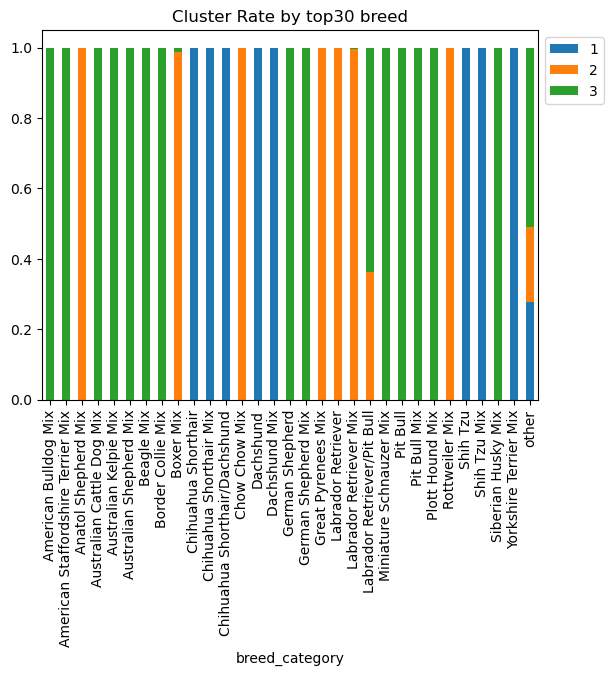

In [130]:
x='Cluster'
y= 'top30 breed'


pc = pd.crosstab(df['breed_category'], df_numeric['Hierarchical_ward_labels'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

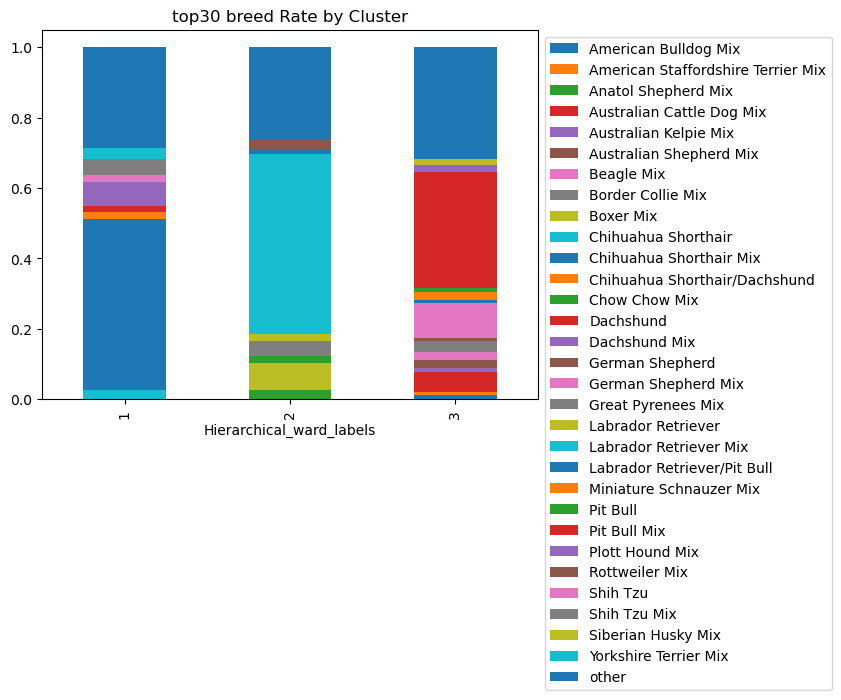

In [131]:
x='top30 breed'
y= 'Cluster'

pc = pd.crosstab( df_numeric['Hierarchical_ward_labels'],df['breed_category'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



Con t= 3 c'è più granuralità rispetto alla taglia come nel caso del K-means.

Per indagare quest'aspetto  relativo alla granularità nelle sezioni successive ho osservato le differenze tra le medie dei cluster per peso e altezza

In [132]:
pd.crosstab(df['breed_category'], df_numeric['Hierarchical_average_labels2']) 

Hierarchical_average_labels2,1,2
breed_category,,
American Bulldog Mix,24,0
American Staffordshire Terrier Mix,0,22
Anatol Shepherd Mix,0,29
Australian Cattle Dog Mix,0,120
Australian Kelpie Mix,0,21
Australian Shepherd Mix,0,52
Beagle Mix,0,46
Border Collie Mix,0,63
Boxer Mix,0,81


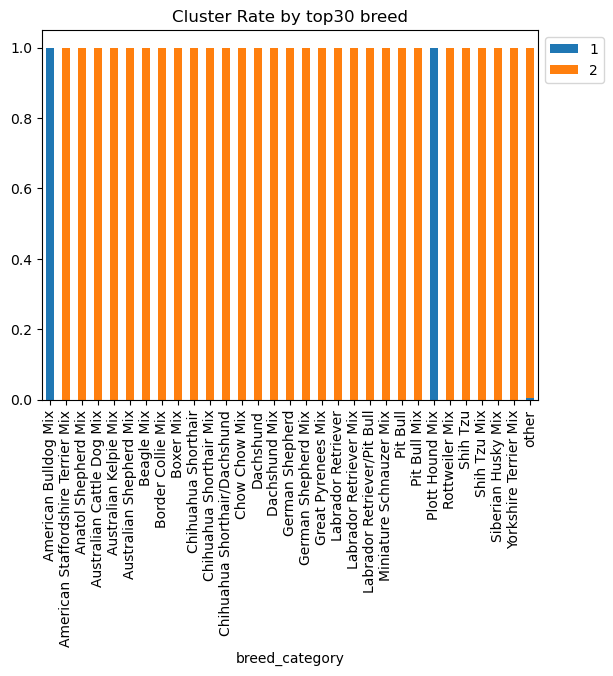

In [133]:
x='Cluster'
y= 'top30 breed'


pc = pd.crosstab(df['breed_category'], df_numeric['Hierarchical_average_labels2'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

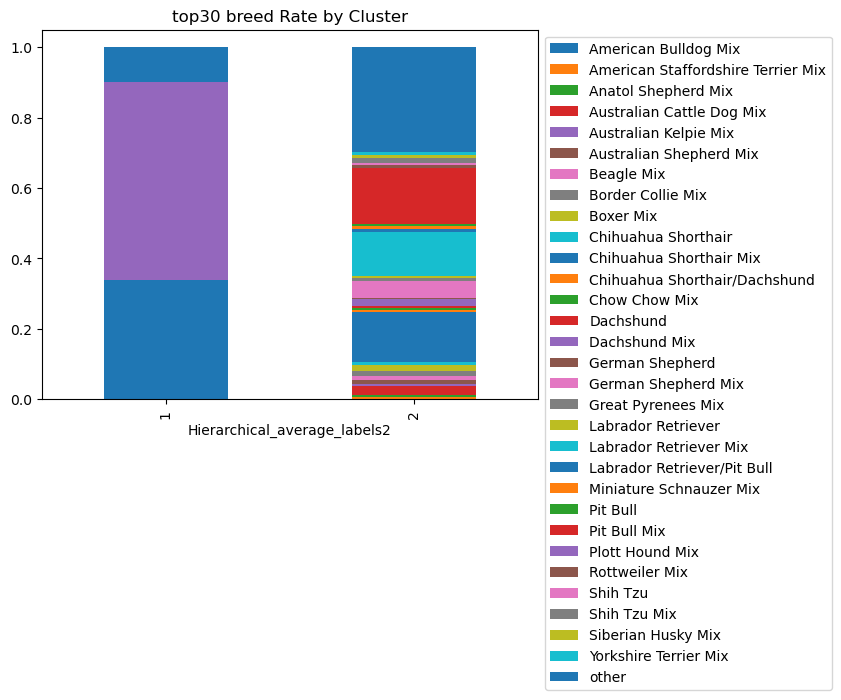

In [134]:
x='top30 breed'
y= 'Cluster'

pc = pd.crosstab( df_numeric['Hierarchical_average_labels2'],df['breed_category'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [135]:
pd.crosstab(df['breed_category'], df_numeric['Hierarchical_average_labels']) 

Hierarchical_average_labels,1,2,3
breed_category,,,
American Bulldog Mix,24,0,0
American Staffordshire Terrier Mix,0,22,0
Anatol Shepherd Mix,0,29,0
Australian Cattle Dog Mix,0,120,0
Australian Kelpie Mix,0,21,0
Australian Shepherd Mix,0,52,0
Beagle Mix,0,0,46
Border Collie Mix,0,63,0
Boxer Mix,0,81,0


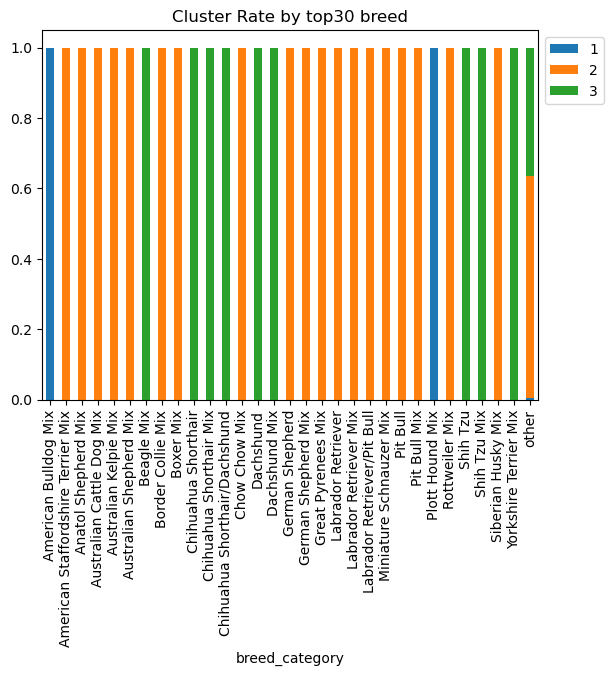

In [136]:
x='Cluster'
y= 'top30 breed'


pc = pd.crosstab(df['breed_category'], df_numeric['Hierarchical_average_labels'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

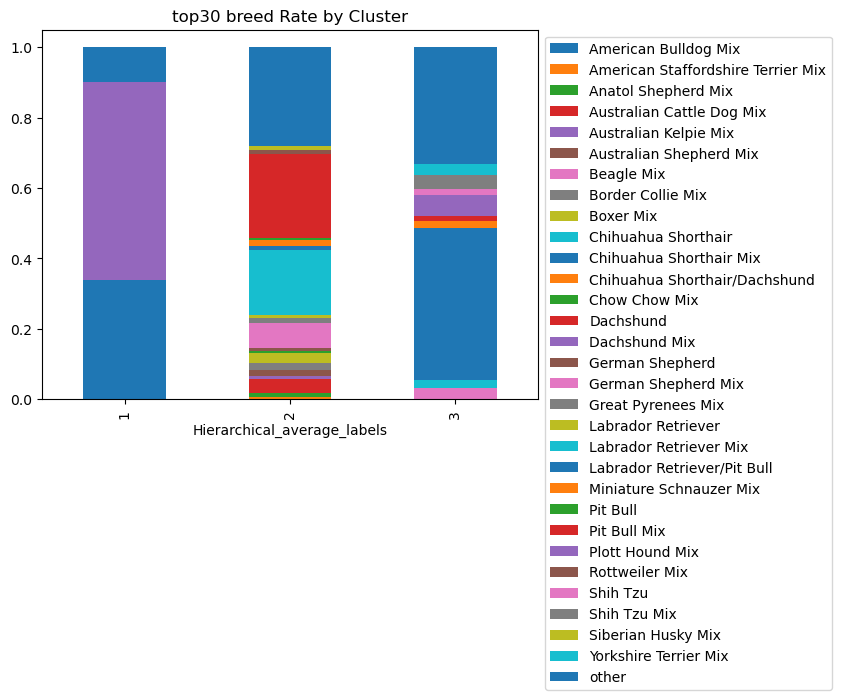

In [137]:
x='top30 breed'
y= 'Cluster'

pc = pd.crosstab( df_numeric['Hierarchical_average_labels'],df['breed_category'])
pcn = pc.div(pc.sum(1).astype(float), axis=0)
pcn.plot(kind='bar', stacked=True,title='%s Rate by %s' % (x, y))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Avarage anche a livelo qualitativo risulta sbilanciato e difficilmente interpretabile, in particolare per t=2 nel quale segmenta le razze di cani senza una distinzione basata sulle taglie separando solo 

American Bulldog Mix e Plot Hound, che dalle analisi precedenti non risultano essere cani con valori estremi e qualche razza rara nel dataset dal resto.


Con t=3 le differenze sono più sfumate ma per comprenderle meglio nella sezion successiva ho osservato le variazioni numeriche di altezza e peso dei cani.

Per outcome type non ci sono divisioni nette per nessuno dei metodi e tagli adoperati.

Disposal e Rto-Adoption risultano in cluster seprati, ma avendo un esemplare solo di entrambe le feature non ha senso fare ulteriori confronti

In [138]:
pd.crosstab(df['outcome_type'], df_numeric['Hierarchical_ward_labels2'])

Hierarchical_ward_labels2,1,2
outcome_type,,
Adoption,251,724
Died,9,28
Disposal,1,0
Euthanasia,85,372
Missing,1,6
Return to Owner,33,155
Rto-Adopt,0,1
Transfer,911,1910


In [139]:
pd.crosstab(df['outcome_type'], df_numeric['Hierarchical_ward_labels']) 

Hierarchical_ward_labels,1,2,3
outcome_type,,,
Adoption,251,257,467
Died,9,12,16
Disposal,1,0,0
Euthanasia,85,97,275
Missing,1,0,6
Return to Owner,33,49,106
Rto-Adopt,0,1,0
Transfer,911,658,1252


In [140]:
pd.crosstab(df['outcome_type'], df_numeric['Hierarchical_average_labels2']) 

Hierarchical_average_labels2,1,2
outcome_type,,
Adoption,11,964
Died,1,36
Disposal,0,1
Euthanasia,3,454
Missing,0,7
Return to Owner,2,186
Rto-Adopt,0,1
Transfer,54,2767


In [141]:
pd.crosstab(df['outcome_type'], df_numeric['Hierarchical_average_labels']) 

Hierarchical_average_labels,1,2,3
outcome_type,,,
Adoption,11,687,277
Died,1,25,11
Disposal,0,0,1
Euthanasia,3,360,94
Missing,0,5,2
Return to Owner,2,151,35
Rto-Adopt,0,1,0
Transfer,54,1735,1032


Dall'osservazione delle medie, della deviazione standard e dei box plot, i valori generati con Ward sono nettamente più distinguibili, si conferma anche  in questo caso una suddivisione in base alla grandezzza del cane.

In [142]:
df_numeric.groupby('Hierarchical_ward_labels')['breed_avg_weight2'].mean()


Hierarchical_ward_labels
1     9.289833
2    73.182263
3    53.436145
Name: breed_avg_weight2, dtype: float64

In [143]:
df_numeric.groupby('Hierarchical_ward_labels')['breed_avg_weight2'].std()

Hierarchical_ward_labels
1     6.639764
2    16.262065
3    12.372983
Name: breed_avg_weight2, dtype: float64

In [144]:
df_numeric.groupby('Hierarchical_average_labels')['breed_avg_weight2'].mean()

Hierarchical_average_labels
1    61.320423
2    62.097039
3    10.725241
Name: breed_avg_weight2, dtype: float64

In [145]:
df_numeric.groupby('Hierarchical_average_labels')['breed_avg_weight2'].std()

Hierarchical_average_labels
1    13.342814
2    14.522873
3     7.752615
Name: breed_avg_weight2, dtype: float64

In [146]:
df_numeric.groupby('Hierarchical_ward_labels2')['breed_avg_weight2'].mean()

Hierarchical_ward_labels2
1     9.289833
2    60.071730
Name: breed_avg_weight2, dtype: float64

In [147]:
df_numeric.groupby('Hierarchical_ward_labels2')['breed_avg_weight2'].std()

Hierarchical_ward_labels2
1     6.639764
2    16.657319
Name: breed_avg_weight2, dtype: float64

In [148]:
df_numeric.groupby('Hierarchical_average_labels2')['breed_avg_weight2'].mean()

Hierarchical_average_labels2
1    61.320423
2    45.205769
Name: breed_avg_weight2, dtype: float64

In [149]:
df_numeric.groupby('Hierarchical_average_labels2')['breed_avg_weight2'].std()

Hierarchical_average_labels2
1    13.342814
2    27.273680
Name: breed_avg_weight2, dtype: float64

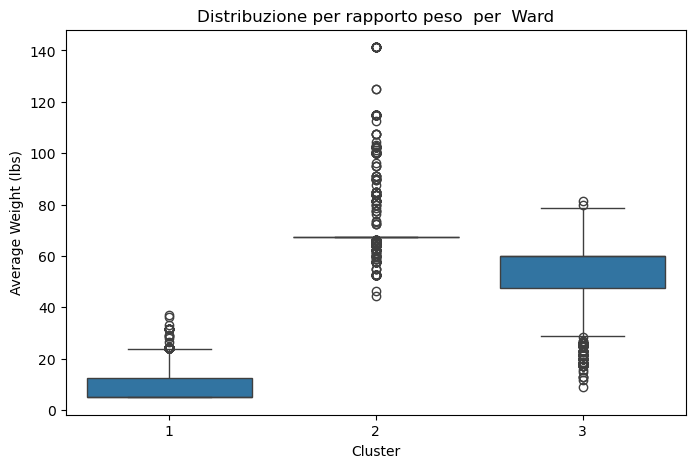

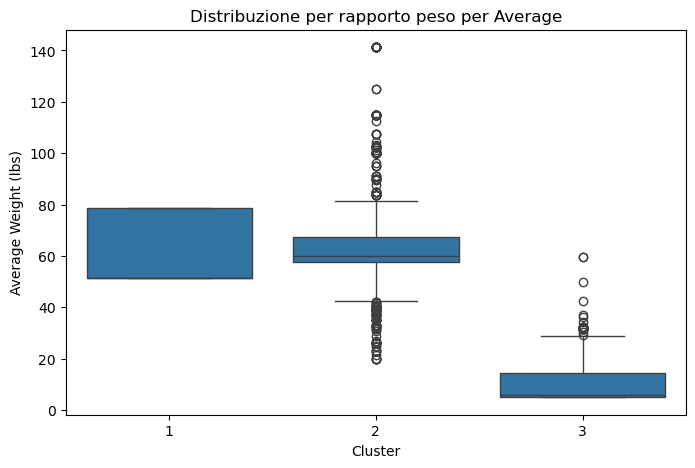

In [150]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_numeric['Hierarchical_ward_labels'], y=df_numeric['breed_avg_weight2'])
plt.xlabel('Cluster')
plt.ylabel('Average Weight (lbs)')
plt.title('Distribuzione per rapporto peso  per  Ward')
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x=df_numeric['Hierarchical_average_labels'], y=df_numeric['breed_avg_weight2'])
plt.xlabel('Cluster')
plt.ylabel('Average Weight (lbs)')
plt.title('Distribuzione per rapporto peso per Average')
plt.show()

Con t = 3, il clustering Ward crea tre gruppi ben separati per fasce di peso, mentre il clustering Average genera una suddivisione meno netta, con un cluster intermedio che presenta maggiore variabilità.

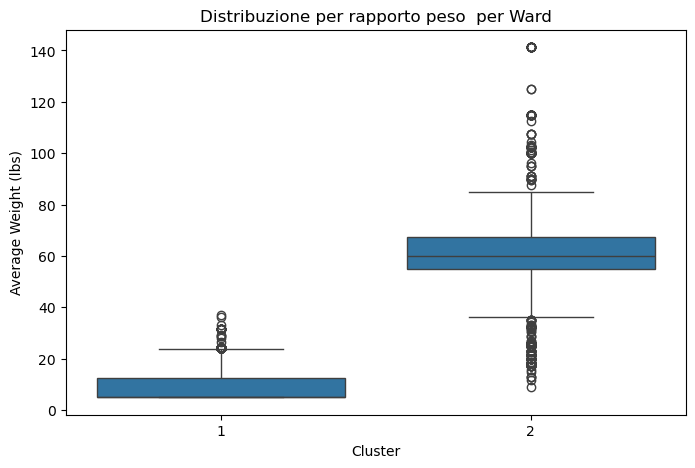

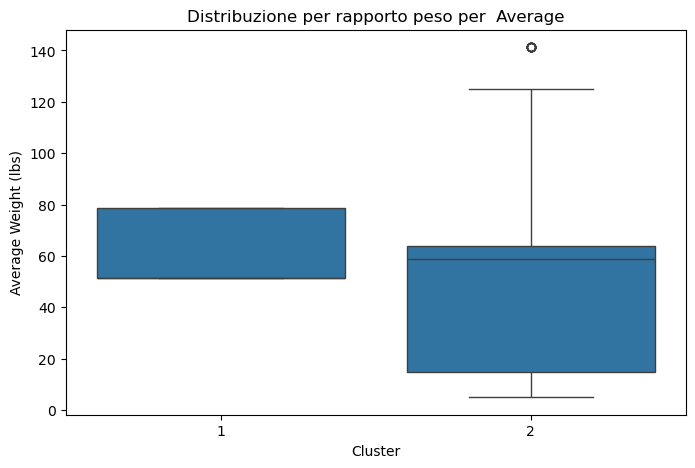

In [151]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_numeric['Hierarchical_ward_labels2'], y=df_numeric['breed_avg_weight2'])
plt.xlabel('Cluster')
plt.ylabel('Average Weight (lbs)')
plt.title('Distribuzione per rapporto peso  per Ward')
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x=df_numeric['Hierarchical_average_labels2'], y=df_numeric['breed_avg_weight2'])
plt.xlabel('Cluster')
plt.ylabel('Average Weight (lbs)')
plt.title('Distribuzione per rapporto peso per  Average')
plt.show()

Considerando che a t=2 le seprazioni sono più nette in termini di peso perchè riduco la granuralità e che il silhouette score di Ward per t=2 è maggiore di Ward e che con PCA  e t-SNE  Ward ha dei cluster più bilanciati e più distinguibili  a livello di distanze. 

Scelgo Ward come metodo ottimale per il tipo di dati che ho.


## Discussion
- summarize your findings and insights, also comparing the performance of each model

Il modello più performante risulta essere K-Means, con un Silhouette Score di 0.31 per k=2 per k=2, segmentando i dati in due  cluster.

Il secondo modello più performante è Hierarchical Clustering con metodo Ward con t=2, con un Silhouette Score intorno a 0.30. 

La separazione dei cluster risulta meno netta rispetto a K-Means, come evidenziato dall’analisi qualitativa sulla distribuzione delle razze, dai boxplot e dalle differenze nei valori medi delle caratteristiche principali. Anche in questo caso la suddivisione sembra in base alla grandezza del cane in termini di peso e altezza.

L'algoritmo meno performante è DBSCAN, che classifica la maggior parte dei punti come rumore, ottenendo Silhouette Score molto bassi (0.09) o non calcolabili, nonostante i diversi tentativi di ottimizzazione dei parametri. Questo suggerisce che DBSCAN non è l'approccio ideale per questo dataset, probabilmente a causa della distribuzione e della densità non uniforme dei dati considerando che ad esempio alcune razze sono molto più frequenti rispetto alle altre come si evince dall'analisi delle frequenze nel notebook precedente e degli otucome_type nel successivo notebook.